In [26]:
#
#USEFUL LINKS
# https://www.kaggle.com/headsortails/explorations-of-action-moa-eda

#GETTING THE CORELATED FEATURES
#https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/

# SORT CORELATION MATRIX
# https://www.geeksforgeeks.org/sort-correlation-matrix-in-python/

# LINK TO GET THE HIGHEST CORELATION PAIR
# https://www.nbshare.io/notebook/394171759/How-To-Use-Pandas-Correlation-Matrix/

# LINK FOR FEATURE IMPORTANCE
# https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

# LINK TO APPROACH MULTILABEL CLASSIFICATION PROBLEM
# https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff
    
# LINK TO INSTALL SCIKIT MULTILEARN
# https://pypi.org/project/scikit-multilearn/

#LINK FOR STACKED CV AND GRIDSEARCH
# https://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/#example-3-stacked-cv-classification-and-gridsearch






#REFERENCE FROM PCA NOTEBOOK : mnist_loadData_pca_tsne



# WHILE PLOTTING REMEMBER THE FOLLOWING  POINTS
# * What are you plotting between what features?

# * Your detailed analysis of the plot. And if you find any anomalies, you need to investigate it further. Research should be in-depth and not one-liners.

# * Then your conclusion from the plot(1-2 sentences)

In [27]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
import pandas as pd
from wordcloud import WordCloud
import time

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.pipeline import Pipeline


from sklearn.multiclass import OneVsRestClassifier
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from tqdm import tqdm 
from sklearn.feature_extraction.text import CountVectorizer
import os
from sklearn.preprocessing import normalize


In [28]:
sample_submission= pd.read_csv('sample_submission.csv')
print(sample_submission.shape)
sample_submission.head()

(3982, 207)


,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_0004d9e33,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,id_001897cda,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,id_002429b5b,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,id_00276f245,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,id_0027f1083,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [29]:
train_features= pd.read_csv('train_features.csv')
print(train_features.shape)
train_features.head()

(23814, 876)


,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [30]:
test_features= pd.read_csv('test_features.csv')
print(test_features.shape)
test_features.head()

(3982, 876)


,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_0004d9e33,trt_cp,24,D1,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,...,0.0981,0.7978,-0.1430,-0.2067,-0.2303,-0.1193,0.0210,-0.0502,0.1510,-0.7750
1,id_001897cda,trt_cp,72,D1,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,...,-0.1190,-0.1852,-1.0310,-1.3670,-0.3690,-0.5382,0.0359,-0.4764,-1.3810,-0.7300
2,id_002429b5b,ctl_vehicle,24,D1,0.1852,-0.1404,-0.3911,0.1310,-1.4380,0.2455,...,-0.2261,0.3370,-1.3840,0.8604,-1.9530,-1.0140,0.8662,1.0160,0.4924,-0.1942
3,id_00276f245,trt_cp,24,D2,0.4828,0.1955,0.3825,0.4244,-0.5855,-1.2020,...,0.1260,0.1570,-0.1784,-1.1200,-0.4325,-0.9005,0.8131,-0.1305,0.5645,-0.5809
4,id_0027f1083,trt_cp,48,D1,-0.3979,-1.2680,1.9130,0.2057,-0.5864,-0.0166,...,0.4965,0.7578,-0.1580,1.0510,0.5742,1.0900,-0.2962,-0.5313,0.9931,1.8380


In [31]:
train_drug= pd.read_csv('train_drug.csv')
print(train_drug.shape)
train_drug.head()

(23814, 2)


,sig_id,drug_id
0,id_000644bb2,b68db1d53
1,id_000779bfc,df89a8e5a
2,id_000a6266a,18bb41b2c
3,id_0015fd391,8c7f86626
4,id_001626bd3,7cbed3131


In [32]:
train_targets_nonscored= pd.read_csv('train_targets_nonscored.csv')
print(train_targets_nonscored.shape)
train_targets_nonscored.head()

(23814, 403)


,sig_id,abc_transporter_expression_enhancer,abl_inhibitor,ace_inhibitor,acetylcholine_release_enhancer,adenosine_deaminase_inhibitor,adenosine_kinase_inhibitor,adenylyl_cyclase_inhibitor,age_inhibitor,alcohol_dehydrogenase_inhibitor,...,ve-cadherin_antagonist,vesicular_monoamine_transporter_inhibitor,vitamin_k_antagonist,voltage-gated_calcium_channel_ligand,voltage-gated_potassium_channel_activator,voltage-gated_sodium_channel_blocker,wdr5_mll_interaction_inhibitor,wnt_agonist,xanthine_oxidase_inhibitor,xiap_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
train_targets_scored= pd.read_csv('train_targets_scored.csv')
print(train_targets_scored.shape)
train_targets_scored.head()

(23814, 207)


,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
train = pd.merge(train_features , train_targets_scored)
print(train.shape)
train.head()

(23814, 1082)


,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0,0,0,0,0,0,0,0,0,0


THE ABOVE ARE THE 6 CSV FILES GIVEN IN THE COMPETITION .
The Train dataset comprises of 23,814 row , with 876 features for each . There are 772 gene expression feature and they are represented by ‘g-’. There are 100 cell viability feature and they are represented by ‘c-’ .

There are 206 scored target which we need to predict. The targets are Binary in Nature.we are also provided with 402 non-scored target.Each row represents a sample which is associated with a unique name sig_id .

# EXPLORATORY DATA ANALYSIS

## CHECKING NUMBER OF UNIQUE VALUES


In [10]:
print(train_features.shape , test_features.shape)
len(train_features.sig_id.unique()) , len(test_features.sig_id.unique())

(23814, 876) (3982, 876)


(23814, 3982)

ALL THE ROWS PRESENT IN THE TRAIN AND TEST FEATURES ARE UNIQUE.

THERE ARE 23814 ROWS IN TRAINING FEATURES DATASET WITH 876 FEATURES , AND 3982 ROWS IN TESTING FEATURES DATASET WITH 876 FEATURES.

## CHECKING MISSING VALUES

In [11]:
# train_features.isnull()
train_features.isnull().sum().sum() , test_features.isnull().sum().sum()

(0, 0)

THERE ARE NO MISSING VALUES IN train_features and TEST_FEATURE DATASET , WHICH MEANS THERE ARE NO NAN VALUES .

In [12]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 876 entries, sig_id to c-99
dtypes: float64(872), int64(1), object(3)
memory usage: 159.2+ MB


In [13]:
train_features.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


In [14]:
train_features.columns

Index(['sig_id', 'cp_type', 'cp_time', 'cp_dose', 'g-0', 'g-1', 'g-2', 'g-3',
       'g-4', 'g-5',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=876)

THE TRAIN FEATURES AND TEST FEATURES DATASET CONTAINS 3 CATEGORICAL FEATURES 'cp_type', 'cp_time', 'cp_dose' .

Text(0.5, 1.0, 'CP_TYPE IN TEST FEATURES')

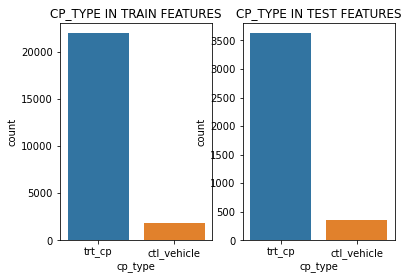

In [15]:
plt.figure(1)# , figsize(20 , 5)
plt.subplot(121)
sns.countplot(x = 'cp_type' , data = train_features)
plt.title('CP_TYPE IN TRAIN FEATURES')
plt.subplot(122)
sns.countplot(x = 'cp_type' , data = test_features)
plt.title('CP_TYPE IN TEST FEATURES')

OBSERVING THE COUNT OF THE CATEGORICAL FEATRUE 'Cp_type' IN THE SAMPLES .

FROM THE PLOT, IT IS CLEAR THAT THE CP_TYPE IS VERY IMBALANCED FOR BOTH TRAINING AND TEST DATASET. ONLY SOME SAMPLES ARE ctl_vehicle WHICH MEANS THE DRUG WON'T PERFORM AND MECHANISM OF ACTION .IN THIS CASE , EXPERIMENT IS CONTROLLABLE .ON THE OTHER HAND , WHERE MAJOR OF SAMPLES ARE trt_cp WHICH MEANS EXPERINMENT IS A TREATMENT .

CONCLUSION :- IN THE OVERVIEW OF THE CHALLENGE IT WAS MENTIONED , THE SAMPLE UNDERGOES EITHER AS TREATMENT OR CONTROL . SINCE EXPERIMENT IN CONTROL DOES NOT GIVE ANY MECHANISM OF ACTION , SO IT WOULD BE BETTER TO REMOVE THE SAMPLES WITH cp_type as ctl_vehicle.

Text(0.5, 1.0, 'cp_time IN TEST FEATURES')

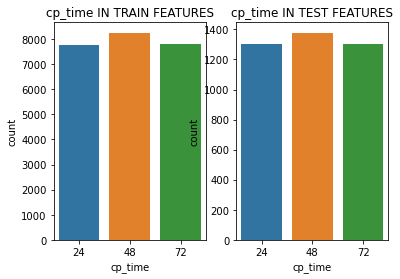

In [16]:
plt.figure(1)# , figsize(20 , 5)
plt.subplot(121)
sns.countplot(x = 'cp_time' , data = train_features)
plt.title('cp_time IN TRAIN FEATURES')
plt.subplot(122)
sns.countplot(x = 'cp_time' , data = test_features)
plt.title('cp_time IN TEST FEATURES')

OBSERVING THE COUNT OF THE CATEGORICAL FEATRUE 'Cp_time' IN THE SAMPLES .

cp_time is the  time elapsed between adding the drug and when the measurement was taken . THE DRUG WAS GIVEN 3 TIMES A DAY FOR THE EXPERIMENTS

CONCLUSION :- THE FEATURE cp_time IS BALANCED FOR BOTH THE TRAINING AND TEST DATASET.

Text(0.5, 1.0, 'cp_dose IN TEST FEATURES')

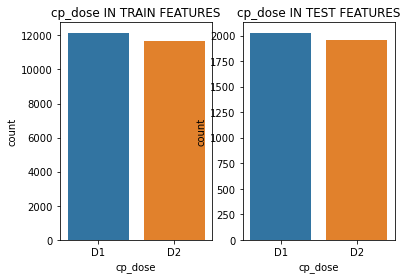

In [17]:
plt.figure(1)# , figsize(20 , 5)
plt.subplot(121)
sns.countplot(x = 'cp_dose' , data = train_features)
plt.title('cp_dose IN TRAIN FEATURES')
plt.subplot(122)
sns.countplot(x = 'cp_dose' , data = test_features)
plt.title('cp_dose IN TEST FEATURES')

OBSERVING THE COUNT OF THE CATEGORICAL FEATRUE 'Cp_dose' IN THE SAMPLES .

cp_dose is the dose level used in the experiment(AMOUNT IN WHICH THE DRUG WAS GIVEN TO THE SAMPLE FOR EXPERIMENT .

CONCLUSION :- THE FEATURE cp_dose IS BALANCED FOR BOTH THE TRAINING AND TEST DATASET.Since each drug is given each time with the given dosage (2 * 3) , so there should be atleast six targets related to a drug.

In [13]:
x_axis = list(train_targets_scored.columns.values)
sig_id_values  = x_axis[1:]
len(sig_id_values) , sig_id_values[:4]


(206,
 ['5-alpha_reductase_inhibitor',
  '11-beta-hsd1_inhibitor',
  'acat_inhibitor',
  'acetylcholine_receptor_agonist'])

In [14]:
count_of_target = train_targets_scored.iloc[:,1:].sum().values
len(count_of_target) , count_of_target[:3]

(206, array([17, 18, 24], dtype=int64))

Text(0.5, 0, 'TARGET FEATUES')

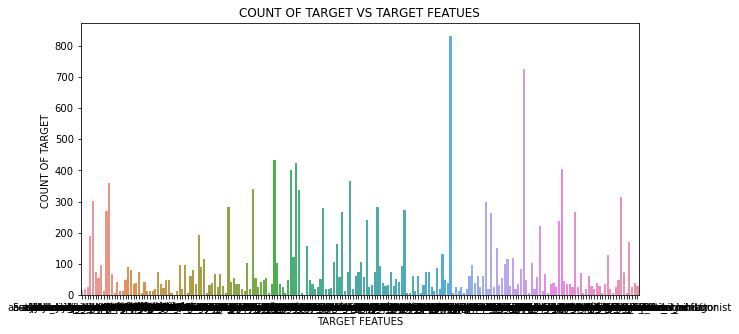

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(sig_id_values, train_targets_scored.iloc[:,1:].sum().values)
plt.title('COUNT OF TARGET VS TARGET FEATUES')
plt.ylabel('COUNT OF TARGET ')
plt.xlabel('TARGET FEATUES')

OBSERVING HOW MANY TIMES A PARTICULAR TARGET APPEARS IN THE DATASET OR SAMPLE

FROM THE ABOVE BARPLOT WE COULD OBSERVE EVERY FEATURE HAS SOME CONTRIBUTION IN MECHANISM OF ACTION IN ATLEAST ONE SAMPLE .WE COULD ALSO OBSERVE SOME OF THE TARGETS OCCUR MORE FREQUENTLY THAN OTHERS.

Text(0, 0.5, 'TARGET FEATUES')

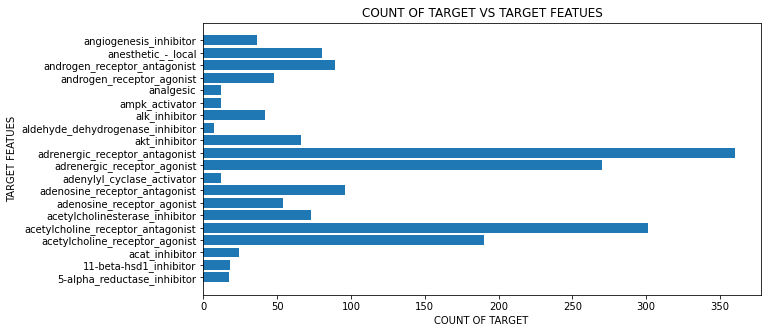

In [16]:
#BARPLOT WITH THE FIRST 20 TARGETS
plt.figure(figsize=(10,5))
# sns.barplot(sig_id_values[:20], train_targets_scored.iloc[:,1:].sum().values[:20])
plt.barh(sig_id_values[:20], train_targets_scored.iloc[:,1:].sum().values[:20])
plt.title('COUNT OF TARGET VS TARGET FEATUES')
plt.xlabel('COUNT OF TARGET ')
plt.ylabel('TARGET FEATUES')

OBSERVING THE FIRST 20 TARGET APPEARED IN THE DATASET OR SAMPLE .

FROM THE ABOVE BARPLOT WE COULD OBSERVE SOME OF THE TARGETS OCCUR MORE FREQUENTLY THAN OTHERS.HENCE THE DISTRIBUTION OF TARGETS ACROSS SAMPLES ARE VERY IMBALANCED . 

In [17]:
dct =dict(zip(sig_id_values, count_of_target)) 

In [18]:
# SORTING DICTIONARY IN DESCENDING OREDER
sorted_dict = dict( sorted(dct.items(), key=lambda i: i[1], reverse=True))

#TOP 20 TARGETS OCCURING MORE FREQUNTLY WITH THEIR COUNTS
list(sorted_dict.items())[:20]

[('nfkb_inhibitor', 832),
 ('proteasome_inhibitor', 726),
 ('cyclooxygenase_inhibitor', 435),
 ('dopamine_receptor_antagonist', 424),
 ('serotonin_receptor_antagonist', 404),
 ('dna_inhibitor', 402),
 ('glutamate_receptor_antagonist', 367),
 ('adrenergic_receptor_antagonist', 360),
 ('cdk_inhibitor', 340),
 ('egfr_inhibitor', 336),
 ('tubulin_inhibitor', 316),
 ('acetylcholine_receptor_antagonist', 301),
 ('pdgfr_inhibitor', 297),
 ('hmgcr_inhibitor', 283),
 ('calcium_channel_blocker', 281),
 ('flt3_inhibitor', 279),
 ('kit_inhibitor', 273),
 ('adrenergic_receptor_agonist', 270),
 ('sodium_channel_inhibitor', 267),
 ('glucocorticoid_receptor_agonist', 266)]

THE ABOVE SHOWS A DICTIONARY sorted_dict WHICH CONTAINS EVERY TAREGET OCCURENCES ON VARIOUS SAMPLES IN DESCENDING ORDER .

# WORD MAP

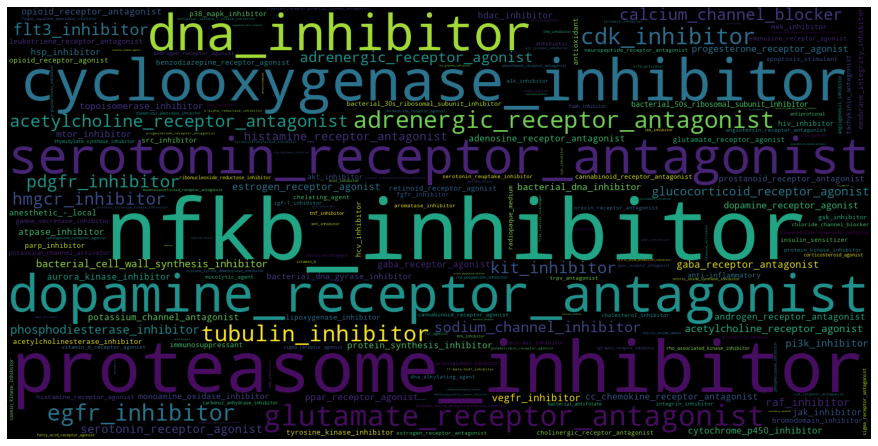

In [27]:
#WORD CLOUD FOR THE TARGETS IN TRAIN
wrd_cloud_dict=dict(sorted_dict.items())
word_cloud=WordCloud(width=1600,height=800,).generate_from_frequencies(wrd_cloud_dict)
plt.figure(figsize=(12,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

VISULALIZING THE OCCURENCE OF TARGETS IN VARIOUS SAMPLE USING WORDCLOUD . THE TARGETS APPEARING IN LARGE FONTS ARE MORE FREQUENT TO OCCUR WHILE THE FEATURES WITH RARE OCCURENCE HAVE FONT SIZE SMALLER AND SMALLER .

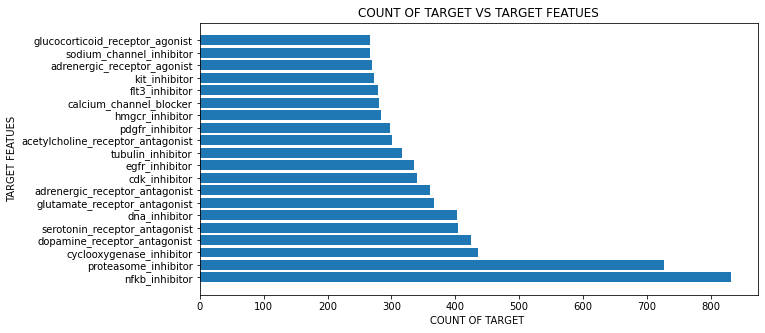

In [24]:
#BARPLOT WITH THE TOP 20 TARGETS
plt.figure(figsize=(10,5))
# sns.barplot(list(sorted_dict.keys())[:20], list(sorted_dict.values())[:20] )
plt.barh(list(sorted_dict.keys())[:20], list(sorted_dict.values())[:20] )
plt.title('COUNT OF TARGET VS TARGET FEATUES')
plt.xlabel('COUNT OF TARGET ')
plt.ylabel('TARGET FEATUES')
plt.show()

OBSERVING THE TOP 20 TARGET APPEARED IN THE DATASET OR SAMPLE .

FROM THE ABOVE BARPLOT WE COULD OBSERVE THE TARGETS nfkb_inhibitor OCCURING  MORE THAN 800 TIMES , protesome_inhibitor OCCURING MORE THAN 700 .THESE ARE THE TWO TARGETS FEATURE WHICH HAVE OCCURED MORE THAN ANY OTHER TARGETS ACROSS VARIOUS SAMPLES. SO IT MIGHT BE POSSIBLE , THE TEST DATA ALSO HAVE OCUURING OF THE TOP TARGET FEATURES .

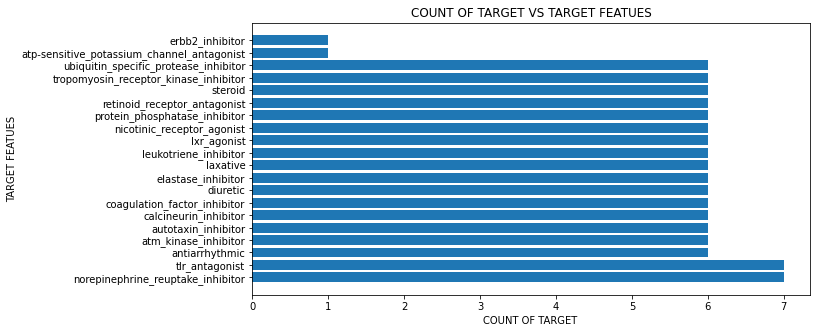

In [25]:
#BARPLOT WITH THE lowest 20 TARGETS
plt.figure(figsize=(10,5))
# sns.barplot(list(sorted_dict.keys())[-20:], list(sorted_dict.values())[-20:] )
plt.barh(list(sorted_dict.keys())[-20:], list(sorted_dict.values())[-20:] )
plt.title('COUNT OF TARGET VS TARGET FEATUES')
plt.xlabel('COUNT OF TARGET ')
plt.ylabel('TARGET FEATUES')
plt.show()

OBSERVING THE LOWEST 20 TARGET APPEARED IN THE DATASET OR SAMPLE .

FROM THE ABOVE BARPLOT WE COULD OBSERVE EVERY TARGETS IS ACTIVATED DURING MECHANISM OF ACTION .EVEN IN THE OVERVIEW OF CHALLENGE IT WAS MADE CLEAR THAT THE DRUG IS GIVEN 3 TIMES A DAY WITH 2 DOSES , SO THERE WOULD BE ATLEAST SIX TARGETS RELATED TO A DRUG .


## HANDLING CATEGORICAL DATA

In the dataset , we could observe three categorical features cp_type , cp_time and cp_dose . The cp_time and cp_dose has its contribution balanced in the dataset but the cp_type  is just the opposite.The functions of the categorical features :- treatment/control (indicates whether the experiment is a treatment  or control), dosage( the dose level used in the experiment) , timing(time elapsed between adding the drug and when the measurement was taken). This feature is imbalanced and as stated in the competition the  drugs with cp_type is controllable i.e. cp_type is ctrl_vehicle , that drug won’t perform any Mechanism of action

In [10]:
#CHECKING THE CATEGORICAL FEATURES IN THE DATASET
train_features.select_dtypes(exclude=['int', 'float']).columns


Index(['sig_id', 'cp_type', 'cp_time', 'cp_dose'], dtype='object')

In [11]:
train_features_new = train_features
train_features_new.head(3)

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931


In [12]:
#ENCODING THE CATEGORICAL DATA
train_features_new['cp_type'] = train_features_new['cp_type'].map({'trt_cp' : 0 , 'ctl_vehicle' : 1})
train_features_new['cp_time'] = train_features_new['cp_time'].map({24 : 0 , 72 : 1 , 48 : 2})
train_features_new['cp_dose'] = train_features_new['cp_dose'].map({'D1' : 0 , 'D2' : 1})

train_features_new.head(3)

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,0,0,0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,0,1,0,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,0,2,0,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931


## GETTING NUMBER OF TARGETS PER SAMPLE

In [11]:
#TRYING TO GET THE COUNTS NO. OF TARGETS A SAMPLE CAN HAVE
# train_targets_scored.columns.values

In [12]:
feature = train_targets_scored.columns.values[1:]
feature[:3]

array(['5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor'], dtype=object)

Text(0, 0.5, 'COUNT')

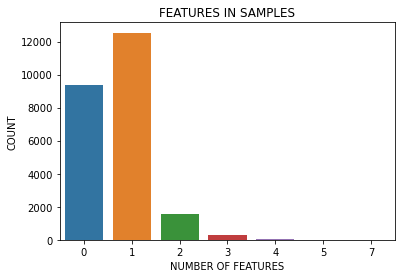

In [34]:
sns.countplot(train_targets_scored[feature].sum(axis = 1) )
plt.title('FEATURES IN SAMPLES')
plt.xlabel('NUMBER OF ACTIVATIONS')
plt.ylabel('COUNT')

OBSERVING NUMBER OF TARGETS PER SAMPLE

MAXIMUM NUMBER OF TARGET PER SAMPLE IS 6.
SINCE THE TARGETS PRESENT CAN EITHER BE ACTIVATED OR NOT , WHEN A DRUG IS GIVEN TO THE SAMPLE .

MOST OF THE SAMPLES HAVE 0 OR 1 TARGETS . ABOUT 9OOO SAMPLES HAVE ZEROS IN ALL COLUMNS AND ABOUT 12,000 SAMPLES HAVE ONLY ONE TARGET IN ACTIVE STATE.PRESENCE OF ACTIVE SAMPLE PER TARGET IS VERY LOW (1 OR 2 PER SAMPLE) . YET THE MOA COUNTS REMAINS THE SAME 6 , THOUGH MAXIMUM GIVE IS 7 . 

IN SIMPLE WORDS , SAMPLES ARE CLASSIFIED TO BINARY TARGETS i.e. [0,1], BUT THERE IS A SMALL PART OF TRAINING SAMPLES CLASSIFIED TO 2, 3,4,5 AND 7 DIFFERENT TARGETS AT THE SAME TIME .

## CHECKING CORELATION AMONG FEATURES

HERE WE WILL CHECK THE CORELATION AMONG FEATURES , TO SEE IF THERE IS A LINEAR RELATIONSHIP BETWEEN THERE VALUES .WE WOULD GET THE abs() value of corelation to show how strong is the corelation (positive or negative).TO REDUCE DIMENSIONS WE COULD DROP THE CORELATED FEATURES TO ENHANCE PERFORMANCE .

In [14]:
cor = train_features.drop(['sig_id'] , axis = 1) # train_features.iloc[:,1:]
cor.head(2)

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,0,0,0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,0,1,0,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371


Wall time: 4min 19s


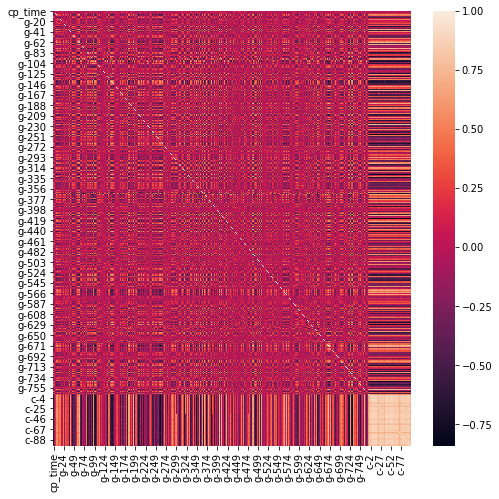

In [39]:
%%time
#GETTING THE CORELATED FEATURES
#https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/

corelation = cor.corr()#FINDING THE CORELATION MATRIX

plt.figure(figsize = (8 , 8))
sns.heatmap(corelation)

OBSERVING THE CORELATION MATRIX AMONG THE FEATURES .

In [33]:
corelation.head()

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
cp_type,1.000000,0.000866,0.000252,-0.072139,-0.066868,-0.053437,0.002551,-0.091805,0.013221,0.092641,...,0.092025,0.084773,0.076649,0.107095,0.104947,0.098305,0.087668,0.092418,0.120323,0.117060
cp_time,0.000866,1.000000,-0.022965,0.022357,0.026878,-0.093490,-0.028330,0.027171,-0.031012,-0.013003,...,-0.022189,-0.025871,-0.037172,-0.014728,-0.033057,-0.065903,-0.029536,-0.037780,-0.052008,-0.037959
cp_dose,0.000252,-0.022965,1.000000,-0.046947,0.101326,-0.097255,0.020745,-0.050323,-0.141974,-0.046977,...,0.021635,0.025650,0.041799,0.029549,0.028690,0.025122,0.026105,0.024246,0.031905,0.026250
g-0,-0.072139,0.022357,-0.046947,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,...,-0.648726,-0.629025,-0.633479,-0.668520,-0.656116,-0.600758,-0.646784,-0.622840,-0.640484,-0.609238
g-1,-0.066868,0.026878,0.101326,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,...,-0.034557,-0.000934,-0.022478,-0.034891,-0.042638,-0.011237,-0.022127,-0.008487,-0.002824,-0.002308


THE ABOVE CSV FILE SHOWS THE CORELATION AMONG FEATURES . IF THE FEATURES ARE HIGHLY CORELATED , WE COULD DISCARD SUCH FEATURES ,AS REDUCING THE NUMBER OF FEATURES WOULD HELP IMPROVE THE PERFORMANCE

In [ ]:
#TRY TO GET THE CORELATION TABLE

In [34]:
len(corelation) , corelation.columns , type(corelation)

(875,
 Index(['cp_type', 'cp_time', 'cp_dose', 'g-0', 'g-1', 'g-2', 'g-3', 'g-4',
        'g-5', 'g-6',
        ...
        'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
        'c-99'],
       dtype='object', length=875),
 pandas.core.frame.DataFrame)

In [35]:
#GETTINGN THE FEATURES WHOSE CORELATION IS >0.9
corelation_feature = set()
for i in tqdm(range(len(corelation.columns))):
    for j in range(i):
        if abs(corelation.iloc[i , j]) > 0.9:#SETTING THE P-VALUE TO BE 0.9
            col = corelation.columns[i]
            corelation_feature.add(col)
len(corelation_feature) , corelation_feature       

100%|████████████████████████████████████████████████████████████████████████████████| 875/875 [00:09<00:00, 93.01it/s]


(28,
 {'c-11',
  'c-13',
  'c-2',
  'c-26',
  'c-31',
  'c-33',
  'c-38',
  'c-4',
  'c-40',
  'c-42',
  'c-51',
  'c-52',
  'c-54',
  'c-55',
  'c-60',
  'c-62',
  'c-63',
  'c-66',
  'c-73',
  'c-75',
  'c-81',
  'c-82',
  'c-85',
  'c-90',
  'c-93',
  'c-94',
  'c-96',
  'g-50'})

In [36]:
#THIS CODE WOULD DROP THE CORELATED FEATURES IN THE ORIGINAL DATA FRAME
cor.drop(corelation_feature , axis = 1 , inplace = True)


In [37]:
cor.head(2)#SO THE CORELATED FEATURE  'c-94', 'c-96' ETC ARE REMOVED

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-86,c-87,c-88,c-89,c-91,c-92,c-95,c-97,c-98,c-99
0,0,0,0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,...,0.5367,-0.1111,-1.0120,0.6685,0.2584,0.8076,0.6584,0.2139,0.3801,0.4176
1,0,1,0,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,...,0.9366,0.8193,-0.4236,0.3192,0.7543,0.4708,0.4899,0.1241,0.6077,0.7371


# CORELATION OF FEATURE WITH TARGET

HERE WE WILL CHECK THE CORELATION BETWEEN FEATURES AND TARGET, TO SEE WHICH FEATURE HAS MORE DEPENDENCY FOR A PARTICULAR TARGET.WE WOULD GET THE MORE DEPENDENT FEATURES AND  DROP THE LESS DEPENDENT FEATURES TO ENHANCE PERFORMANCE .

In [15]:
data = pd.merge(train_features_new , train_targets_scored)
print(data.shape)
data.head()

(23814, 1082)


,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,1,0,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,2,0,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,2,0,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,1,1,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0,0,0,0,0,0,0,0,0,0


In [16]:
cor = data.drop(['sig_id'] , axis = 1) # train_features.iloc[:,1:]
cor.head(2)

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,0,0,0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,...,0,0,0,0,0,0,0,0,0,0


In [17]:
%%time
#GETTING THE CORELATED FEATURES
#https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/

corelation = cor.corr()#FINDING THE CORELATION MATRIX

Wall time: 3min 7s


In [18]:
corelation.head()

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
cp_type,1.000000,0.000866,0.000252,-0.072139,-0.066868,-0.053437,0.002551,-0.091805,0.013221,0.092641,...,-0.004629,-0.009452,-0.013104,-0.033813,-0.016169,-0.004629,-0.024724,-0.009640,-0.011809,-0.010356
cp_time,0.000866,1.000000,-0.022965,0.022357,0.026878,-0.093490,-0.028330,0.027171,-0.031012,-0.013003,...,-0.000389,0.000788,-0.001100,-0.001049,-0.000431,-0.000389,0.000357,0.002292,0.002808,-0.000869
cp_dose,0.000252,-0.022965,1.000000,-0.046947,0.101326,-0.097255,0.020745,-0.050323,-0.141974,-0.046977,...,0.000320,-0.000643,0.000906,0.000136,0.000358,0.000320,-0.000286,-0.001877,-0.002300,0.000716
g-0,-0.072139,0.022357,-0.046947,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,...,-0.005502,-0.005343,-0.011480,-0.035796,-0.011603,-0.005810,0.008336,-0.006992,-0.004046,-0.006481
g-1,-0.066868,0.026878,0.101326,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,...,-0.005564,0.009758,0.000162,-0.003212,0.005468,-0.002795,-0.007093,-0.001118,-0.000202,0.000681


In [19]:
corelation_new = corelation.iloc[:875,875:]
corelation_new

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
cp_type,-0.007793,-0.008019,-0.009261,-0.026149,-0.032990,-0.016169,-0.013901,-0.018550,-0.006547,-0.031225,...,-0.004629,-0.009452,-0.013104,-0.033813,-0.016169,-0.004629,-0.024724,-0.009640,-0.011809,-0.010356
cp_time,-0.000654,-0.000673,-0.000777,0.000107,-0.001853,-0.000431,-0.001167,0.000867,-0.000550,-0.001654,...,-0.000389,0.000788,-0.001100,-0.001049,-0.000431,-0.000389,0.000357,0.002292,0.002808,-0.000869
cp_dose,-0.001034,0.000554,0.000640,-0.001025,0.001905,0.000358,0.000961,-0.000043,0.000453,0.001366,...,0.000320,-0.000643,0.000906,0.000136,0.000358,0.000320,-0.000286,-0.001877,-0.002300,0.000716
g-0,-0.008317,-0.011513,0.003049,-0.019100,-0.034001,-0.009239,-0.019205,-0.011048,-0.008982,-0.028803,...,-0.005502,-0.005343,-0.011480,-0.035796,-0.011603,-0.005810,0.008336,-0.006992,-0.004046,-0.006481
g-1,-0.004291,-0.004084,-0.000265,-0.005629,0.004920,0.009246,-0.003603,0.006332,-0.001601,0.012687,...,-0.005564,0.009758,0.000162,-0.003212,0.005468,-0.002795,-0.007093,-0.001118,-0.000202,0.000681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c-95,0.010113,0.004202,0.003092,0.022601,0.029189,0.014921,0.016299,0.014628,0.001739,0.022537,...,0.004961,-0.003125,0.010209,-0.066567,-0.003060,0.003947,-0.014844,0.010449,0.009496,0.009497
c-96,0.008570,0.008131,0.010796,0.019768,0.029630,0.012617,0.012412,0.016469,0.006084,0.028096,...,0.002569,-0.000608,0.011297,-0.091944,0.007333,0.002410,0.000934,0.008592,0.014562,0.010589
c-97,0.009440,0.003168,0.009347,0.021624,0.026226,0.016902,0.013411,0.015404,-0.004710,0.027801,...,0.002164,-0.000334,0.010238,-0.121671,0.008242,-0.000108,0.012341,0.005864,0.006122,0.010069
c-98,0.013253,0.010387,0.010546,0.030946,0.035763,0.019600,0.020482,0.014439,0.005435,0.035462,...,0.002689,-0.001405,0.009950,-0.032937,-0.001435,0.003070,-0.082568,0.008877,0.013823,0.015453


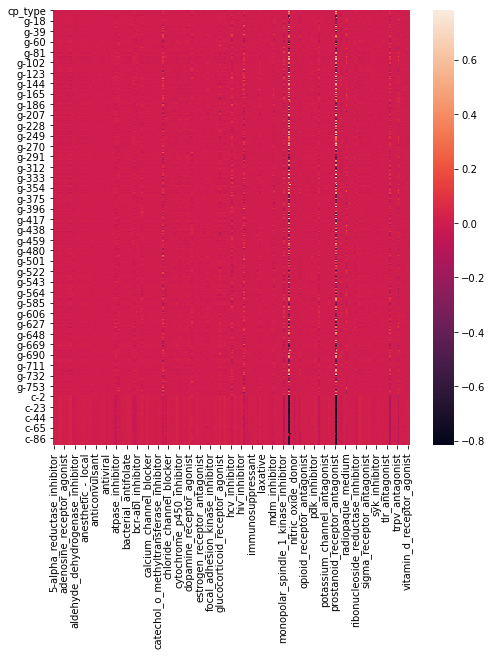

In [20]:
plt.figure(figsize = (8 , 8))
sns.heatmap(corelation_new)

OBSERVING THE CORELATION MATRIX AMONG THE FEATURES AND TARGET .

FROM THE GRAPH WE CANNOT OBSERVE ANY FEATURES HAVING MUCH CORELATION WITH ANY TARGET VARIABLES , SO TO TELLWHICH FEATURE HAS  MORE CONTRIBUTION TOWARDS A PARTICULAR TARGET IS VERY DIFFICULT .LETS GET THE TABLE WITH CORELATION BETWEEN FEATURE AND TARGET .

In [21]:
len(corelation_new) , corelation_new.columns , type(corelation_new)

(875,
 Index(['5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
        'acat_inhibitor', 'acetylcholine_receptor_agonist',
        'acetylcholine_receptor_antagonist', 'acetylcholinesterase_inhibitor',
        'adenosine_receptor_agonist', 'adenosine_receptor_antagonist',
        'adenylyl_cyclase_activator', 'adrenergic_receptor_agonist',
        ...
        'tropomyosin_receptor_kinase_inhibitor', 'trpv_agonist',
        'trpv_antagonist', 'tubulin_inhibitor', 'tyrosine_kinase_inhibitor',
        'ubiquitin_specific_protease_inhibitor', 'vegfr_inhibitor', 'vitamin_b',
        'vitamin_d_receptor_agonist', 'wnt_inhibitor'],
       dtype='object', length=206),
 pandas.core.frame.DataFrame)

In [22]:
corelation_new.iloc[0]

5-alpha_reductase_inhibitor             -0.007793
11-beta-hsd1_inhibitor                  -0.008019
acat_inhibitor                          -0.009261
acetylcholine_receptor_agonist          -0.026149
acetylcholine_receptor_antagonist       -0.032990
                                           ...   
ubiquitin_specific_protease_inhibitor   -0.004629
vegfr_inhibitor                         -0.024724
vitamin_b                               -0.009640
vitamin_d_receptor_agonist              -0.011809
wnt_inhibitor                           -0.010356
Name: cp_type, Length: 206, dtype: float64

In [23]:
#TARGETS WITH CORELATION
corelation_feature = set()
for i in tqdm(range(len(corelation_new.columns))):
    for j in range(i):
        if abs(corelation_new.iloc[i , j]) > 0.6:#SETTING THE P-VALUE TO BE 0.9
            col = corelation_new.columns[i]
            corelation_feature.add(col)
len(corelation_feature) , corelation_feature       

100%|███████████████████████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 417.25it/s]


(8,
 {'pdk_inhibitor',
  'protein_synthesis_inhibitor',
  'retinoid_receptor_agonist',
  'rho_associated_kinase_inhibitor',
  'syk_inhibitor',
  'tgf-beta_receptor_inhibitor',
  'trpv_antagonist',
  'vitamin_d_receptor_agonist'})

In [26]:
# LINK TO GET THE HIGHEST CORELATION PAIR
# https://www.nbshare.io/notebook/394171759/How-To-Use-Pandas-Correlation-Matrix/
sort_corr = corelation_new.abs().unstack()
sort_corr.sort_values(ascending = False).drop_duplicates()[:10]#REMOVING THE DUPLICATE VALUES

# sort_corr[:10]

proteasome_inhibitor  c-78     0.815505
                      c-32     0.799968
                      c-31     0.794565
                      c-53     0.794077
                      c-83     0.784059
                      c-16     0.783550
                      g-349    0.782439
                      c-85     0.780657
                      c-44     0.778452
                      c-88     0.778404
dtype: float64

In [28]:
# SORT CORELATION MATRIX
# https://www.geeksforgeeks.org/sort-correlation-matrix-in-python/

upper_corr_mat = corelation_new.where( 
    np.triu(np.ones(corelation_new.shape), k=1).astype(np.bool)) 
  
# Convert to 1-D series and drop Null values 
sort_corr_2 = upper_corr_mat.unstack().dropna() 
  
# Sort correlation pairs 
sort_corr_2 = abs(sort_corr_2).sort_values(ascending = False) 
print(sort_corr_2) , 

proteasome_inhibitor                       g-123    0.717907
                                           g-63     0.697660
                                           g-67     0.688205
                                           g-132    0.676360
                                           g-131    0.674284
                                                      ...   
ubiquitin_specific_protease_inhibitor      g-113    0.000004
pdk_inhibitor                              g-36     0.000003
sigma_receptor_antagonist                  g-59     0.000002
sigma_receptor_agonist                     g-82     0.000002
bacterial_30s_ribosomal_subunit_inhibitor  g-25     0.000001
Length: 21115, dtype: float64


(None,)

In [30]:
sort_corr_2[:30]

proteasome_inhibitor  g-123    0.717907
                      g-63     0.697660
                      g-67     0.688205
                      g-132    0.676360
                      g-131    0.674284
nfkb_inhibitor        g-123    0.669726
proteasome_inhibitor  g-62     0.667451
                      g-97     0.667071
                      g-75     0.662892
                      g-147    0.654636
                      g-41     0.652921
nfkb_inhibitor        g-63     0.647721
                      g-67     0.641563
                      g-132    0.634456
                      g-131    0.628744
proteasome_inhibitor  g-31     0.624404
nfkb_inhibitor        g-97     0.622932
                      g-62     0.621762
proteasome_inhibitor  g-128    0.620954
                      g-46     0.619787
nfkb_inhibitor        g-75     0.618988
proteasome_inhibitor  g-96     0.616563
                      g-72     0.615771
                      g-155    0.611547
                      g-0      0.609172


THE ABOVE TWO TABLE SHOWS THE HIGHER CORELATION BETWEEN TARGETS AND FEATURES .
I HAVE TRIED TWO WAYS TO GET THE HIGHER CORELATION AND I COULD OBSERVE TWO DIFFERENT RESULTS .

# UNIVARIATE ANALYSIS

In [23]:
data = pd.merge(train_features_new , train_targets_scored)
print(data.shape)
data.head()

(23814, 1082)


,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,1,0,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,2,0,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,2,0,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,1,1,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# LINK FOR FEATURE IMPORTANCE
# https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

X = data.iloc[:,1:875]  #FEATURES
y = data.iloc[:,876]    #ONE TARGET COLUMN : '5-alpha_reductase_inhibitor'


In [33]:
#SINCE IT'S A MULTILABEL CLASSIFICATION PROBLEM SELECTION A SINGLE TARGET FOR FEATURE SELECTION
data.columns[876]

'5-alpha_reductase_inhibitor'

In [29]:
#GETTING THE 10 BEST FEATURES USING SelectKBest
#NOT ABLE TO PROCESS THE CODE .
bestfeatures = SelectKBest(score_func=chi2, k=10)
model = bestfeatures.fit(X,y)


ValueError: Input X must be non-negative.

In [ ]:
model.scores_

# FEATURE IMPORTANCE USING ExtraTreesClassifier

SINCE IT IS A MULTI LABEL CLASSIFICATION PROBLEM , AND WE CAN'T GET THE FEATURE IMPORTANCE FOR EVERY TARGET . WE TRY TO OBSERVE THE FEATURES IMPORTANT USING ExtraTreesClassifier MODEL FOR A SINGLE TARGET 5-alpha_reductase_inhibitor.

In [27]:
%%time
model = ExtraTreesClassifier()
model.fit(X,y)

Wall time: 7.33 s


ExtraTreesClassifier()

In [28]:
#GETTING FEATURE IMPORTANCE USING ExtraTreesClassifier
print(model.feature_importances_) 

[2.95542470e-04 4.39036636e-04 6.76599045e-05 7.13150926e-04
 1.27550523e-03 1.17346706e-04 2.39807044e-04 3.37920648e-04
 3.71223141e-03 6.29154976e-06 5.71994356e-04 2.94440011e-04
 1.61093297e-03 1.25708517e-04 1.56221895e-03 1.68722569e-03
 1.57638141e-03 2.16240095e-03 7.83222376e-04 1.00567676e-03
 2.26216795e-03 9.62001321e-04 4.14372059e-04 2.94528129e-04
 5.21948285e-04 1.54189819e-04 5.43807636e-04 3.09527783e-05
 9.17623239e-04 6.75971310e-04 5.65198519e-04 9.75242443e-04
 6.89169627e-04 7.51700004e-04 2.74825245e-03 1.88541610e-04
 1.22748284e-03 4.88824808e-06 5.00600395e-04 7.59827772e-04
 2.19305065e-03 2.30281683e-03 1.31009761e-03 9.06241367e-05
 6.78896536e-04 8.30342162e-04 1.15977923e-03 2.26494143e-03
 1.24389275e-03 2.17585723e-03 7.86125771e-04 8.59895176e-05
 6.13794137e-04 1.30717051e-03 2.47553464e-03 1.11677954e-03
 2.81168559e-04 8.10010608e-04 1.35764518e-03 9.55646277e-04
 1.88325137e-03 2.37508053e-04 2.98004905e-05 2.17153195e-04
 1.57860383e-03 1.681582

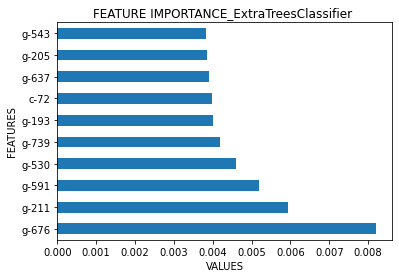

In [39]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('FEATURE IMPORTANCE_ExtraTreesClassifier ')
plt.ylabel('FEATURES')
plt.xlabel('VALUES')
plt.show()

OSERVATION FEATURE IMPORTANCE_ExtraTreesClassifier.

THE ABOVE GRAPH SHOWS THE TOP FEATURES CONTRIBUTING TO THE TARGET 5-alpha_reductase_inhibitor. 

# VARIANCE THRESHOLD

VARIANCE IS DEFINED AS THE AVERAGE OF THE SQUARED DIFFERENCES FROM THE MEAN i.e MORE THE VARIANCE MORE THE INFORMATION . 
IF THE VARIANCE FOR A FEATURE IS LOW OR ZERO , THEN THE FEATURE IS CONSTANT AND WON'T INCREASE THE PERFORMANCE OF MODEL. SO TO IMPROVE THE PERFORMANCE OF THE MODEL , WE COULD DISCARD THE LOW VARIANCE FEATURES.

In [19]:
train_features_new.head(1)

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,0,0,0,1.062,0.5577,-0.2479,-0.6208,-0.1944,-1.012,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176


In [21]:
var = []
for feat in tqdm(train_features_new.columns[1:]):
    var.append(train_features_new[feat].var())
variance = pd.DataFrame()
variance['Features'] = train_features_new.columns[1:]
variance['Variance'] = var
variance.head()

100%|██████████████████████████████████████████████████████████████████████████████| 875/875 [00:00<00:00, 3328.91it/s]


,Features,Variance
0,cp_type,0.072220
1,cp_time,0.672423
2,cp_dose,0.249909
3,g-0,1.941560
4,g-1,0.659934


In [22]:
variance.sort_values(by = 'Variance' , ascending = True)

,Features,Variance
0,cp_type,0.072220
2,cp_dose,0.249909
222,g-219,0.333275
310,g-307,0.362439
107,g-104,0.386126
...,...,...
53,g-50,5.093970
801,c-26,5.148048
793,c-18,5.266561
813,c-38,5.277933


OSERVATION VARIANCE OF FEATURES

THE DATAFRAME SHOWN IS FROM LOW TO HIGH VARIANCE .SO TO GET THE IMPORTANT FEATURES WE COULD REMOVE FEATURES HAVING VARIANCE LESS THEN 0.4 . 

#VARIANCE THRESHOLD FOR FEATURE SELECTION

In [40]:
model=VarianceThreshold(threshold=0.2)
model.fit(X)

VarianceThreshold(threshold=0.2)

In [41]:
model.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

# FEATURE IMPORTANCE USING xgboost

SINCE IT IS A MULTI LABEL CLASSIFICATION PROBLEM , AND WE CAN'T GET THE FEATURE IMPORTANCE FOR EVERY TARGET . WE TRY TO OBSERVE THE FEATURES IMPORTANT USING XGBOOST MODEL .

In [42]:
%%time
model = XGBClassifier()
model.fit(X, y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
# GETTING THE FEATURE IMPORTANCE
print(model.feature_importances_)

[0.         0.         0.         0.00048331 0.         0.
 0.         0.         0.00053362 0.         0.         0.
 0.         0.         0.         0.00810914 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00399213 0.
 0.         0.         0.         0.         0.00730648 0.00420374
 0.         0.00524175 0.         0.         0.         0.
 0.         0.01801446 0.         0.         0.         0.
 0.         0.         0.         0.         0.00304052 0.
 0.         0.         0.         0.         0.         0.01306652
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00081058 0.
 0.         0.00807225 0.         0.00363136 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

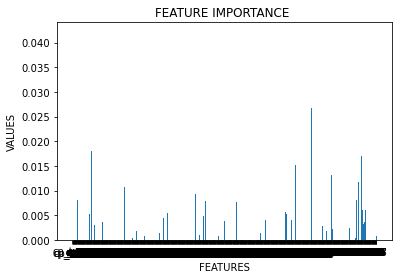

In [47]:
plt.bar(X.columns , model.feature_importances_)
plt.title('FEATURE IMPORTANCE ')
plt.xlabel('FEATURES')
plt.ylabel('VALUES')
plt.show()


OBSERVING THE FEATURES IMPORTANCE USING XGBOOST .

THE ABOVE GRAPH SHOWS THE MOST IMPORTANT FETURES FOR THE TARGET USING XGBOOST . THE ABOVE GRAPH IS VERY CONGESTED . LET'S LOOK AT THE TOP 10 FEATURES IMPORTANCE .

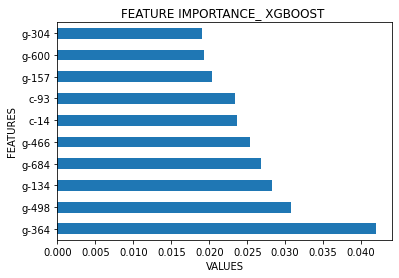

In [45]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('FEATURE IMPORTANCE_ XGBOOST ')
plt.ylabel('FEATURES')
plt.xlabel('VALUES')
plt.show()

OBSERVING THE FEATURE IMPORTANCE USING XGBOOST .

THE ABOVE GRAPH SHOWS THE MOST IMPORTANT FETURES FOR THE TARGET USING XGBOOST

# FEATURE IMPORTANCE USING mutual_info_classif

MUTUAL INFORMATION BETWEEN TWO VARIABLES(FEATURES) IS A NON-NEGATIVE VALUE , WHICH MEASURES DEPENDENCY BETWEEN THE VARIABLES . IT THE VALUE IS ZERO , THE VARIABLES ARE INDEPENDENT AND HIGHER VALUES MEANS HIGHER DEPENDENCY.

IN SIMPLE WORDS IT SHOWS HOW DEPENDENT A FEATURE IS TO THE TARGET .

In [53]:
%%time
#GETS THE MUTUAL INFORMATION BETWEEN FEATURES AND TARGETS
model = mutual_info_classif(X, y)
model

array([3.17225441e-04, 1.30543736e-03, 1.54743506e-03, 4.20343671e-04,
       6.22088843e-05, 5.40039990e-05, 1.46952456e-04, 1.84845287e-04,
       0.00000000e+00, 1.27096008e-04, 1.10806583e-04, 2.16118793e-04,
       1.01399064e-05, 1.02798497e-04, 1.31921945e-04, 6.51346375e-05,
       0.00000000e+00, 8.07883921e-05, 0.00000000e+00, 0.00000000e+00,
       4.90549556e-05, 1.06052224e-04, 3.24481778e-04, 0.00000000e+00,
       3.77916926e-04, 3.34827325e-07, 1.65774749e-04, 1.04483304e-04,
       0.00000000e+00, 1.76366292e-04, 2.60212843e-05, 6.13780768e-05,
       4.29921232e-04, 2.29705521e-05, 6.51200661e-05, 7.98346440e-05,
       2.19299128e-04, 2.69668472e-04, 1.23365936e-05, 6.73614020e-05,
       8.16730011e-05, 3.37391755e-04, 2.36660748e-04, 0.00000000e+00,
       3.95665379e-05, 6.99831610e-05, 3.89388711e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.29161232e-04, 4.68484727e-04,
       0.00000000e+00, 9.48067576e-05, 6.27055302e-05, 5.65839511e-04,
      

In [54]:
mutual_info = pd.Series(model)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

cp_dose    0.001547
cp_time    0.001305
g-235      0.000881
c-55       0.000769
g-389      0.000755
             ...   
g-376      0.000000
c-33       0.000000
g-382      0.000000
c-30       0.000000
g-433      0.000000
Length: 874, dtype: float64

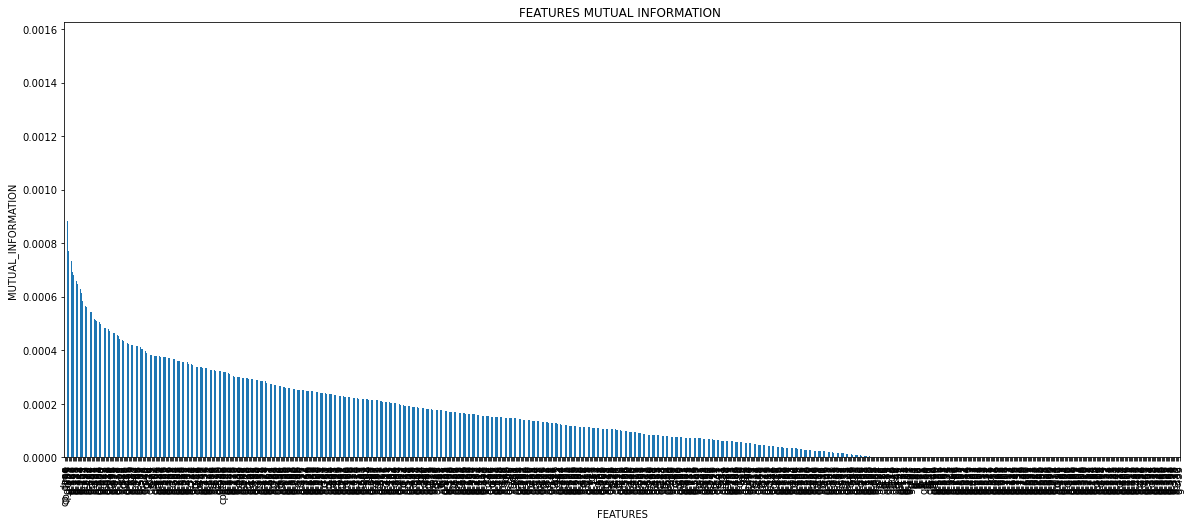

In [56]:
#PLOTTING MUTUAL INFO VS FEATURES
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.title('FEATURES MUTUAL INFORMATION ')
plt.xlabel('FEATURES')
plt.ylabel('MUTUAL_INFORMATION')
plt.show()

OBSERVING THE FEATURES MUTUAL INFORMATION .

THE ABOVE GRAPH SHOWS THE MOST IMPORTANT FETURES FOR THE TARGET USING FEATURES MUTUAL INFORMATION . THE ABOVE GRAPH IS VERY CONGESTED . LET'S LOOK AT THE TOP 10 FEATURES WITH MOST MUTUAL INFORMATION .

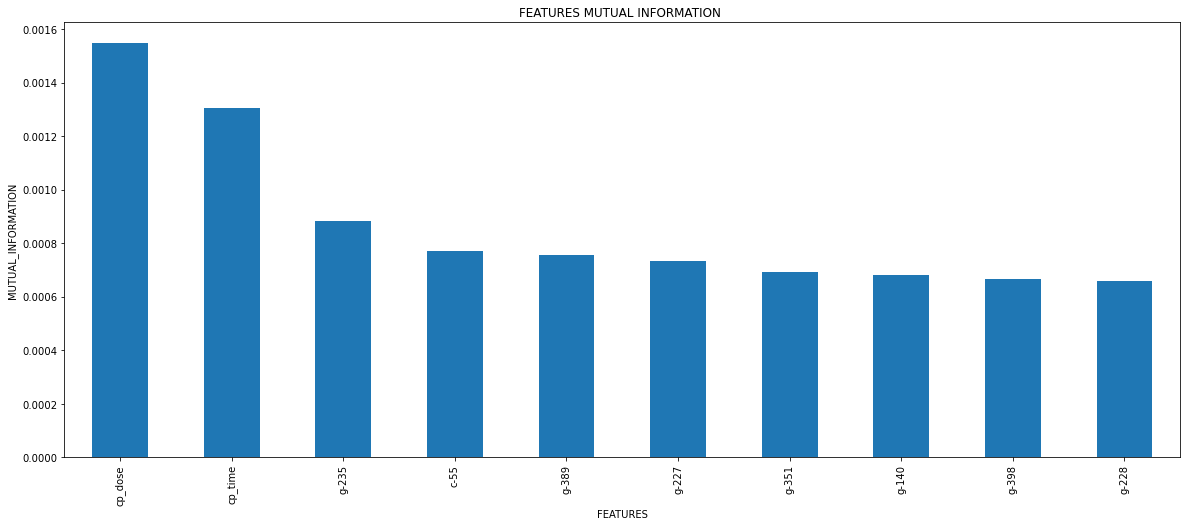

In [55]:
mutual_info.sort_values(ascending=False)[:10].plot.bar(figsize=(20, 8))
plt.title('FEATURES MUTUAL INFORMATION ')
plt.xlabel('FEATURES')
plt.ylabel('MUTUAL_INFORMATION')
plt.show()

OBSERVING THE FEATURES MUTUAL INFORMATION .

THE ABOVE GRAPH SHOWS THE MOST IMPORTANT FETURES FOR THE TARGET USING FEATURES MUTUAL INFORMATION . THE ABOVE GRAPH SHOWS THE TOP 10 FEATURES WITH MOST MUTUAL INFORMATION (cp_dose, cp_time , g-235 and many more).

# PCA

AS THE NUMBER OF FEATURES IN THE DATASET IS 846 , SO DIMESIONALITY REDUCTION WOULD HELP ACHIEVE FASTER RESULTS .

In [18]:
train_features_new.head(3)

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,0,0,0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,0,1,0,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,0,2,0,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931


In [20]:
train_features_new.iloc[:,1:].head()

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,0,0,0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,0,1,0,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,0,2,0,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,0,2,0,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,0,1,1,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [16]:
#REFERENCE FROM PCA NOTEBOOK : mnist_loadData_pca_tsne

from sklearn import decomposition
pca = decomposition.PCA() # INIATIALIZING THE PCA

trial_pca = train_features_new
print("SHAPE OF DATA BEFORE PCA = ", trial_pca.shape)

pca.n_components = 2
data_after_pca = pca.fit_transform(trial_pca.iloc[: , 1:])
print("SHAPE OF DATA AFTER PCA = ", data_after_pca.shape)

SHAPE OF DATA BEFORE PCA =  (23814, 876)
SHAPE OF DATA AFTER PCA =  (23814, 2)


[-11.02153517   0.10916024]


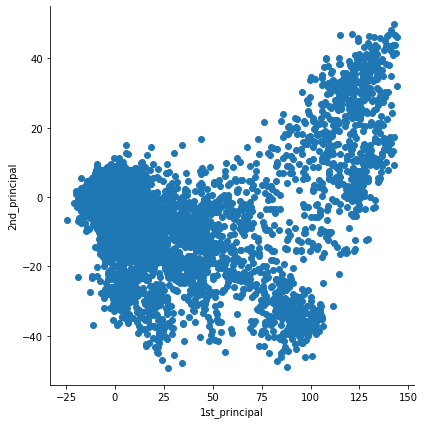

In [17]:
#DELETE
#NOT ABLE TO GIVE THE COLOR CODING FOR ALL THE 206 TARGETS

print(data_after_pca[0])

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=data_after_pca, columns=("1st_principal", "2nd_principal"))
sns.FacetGrid(pca_df,  size=6).map(plt.scatter, '1st_principal', '2nd_principal')
plt.show()

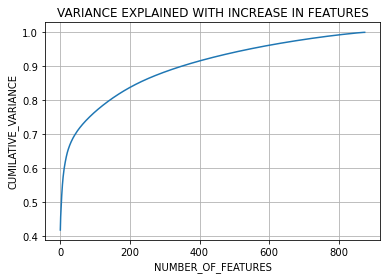

In [19]:
# PCA DIMENSIONALITY REDUCTION
#TRYING TO GET THE BEST DIMENSION FOR MAX VARIANCE i.e INFORMATIION GIVEN BY FEATURES

pca.n_components = 875 #USING ALL THE FEATURES
pca_data = pca.fit_transform(trial_pca.iloc[: , 1:])

explained_var = pca.explained_variance_ / np.sum(pca.explained_variance_); #GIVES HOW MUCH VARIANCE IS GIVEN BY THE NO. OF FEAT

cum_variance = np.cumsum(explained_var) #GETTING CUMILATIVE VARIANCE (COMBINING FEATURES ONE BY ONE)

plt.figure()

# plt.clf()
plt.plot(cum_variance) #, linewidth=2
# plt.axis('tight')
plt.grid()
plt.title('VARIANCE EXPLAINED WITH INCREASE IN FEATURES')
plt.xlabel('NUMBER_OF_FEATURES')
plt.ylabel('CUMILATIVE_VARIANCE')
plt.show()


OBSERVING VARIANCE EXPLAINED WITH INCREASE IN FEATURES

WE PERFORM PCA ON THE TRAIN DATA TO CHECK TILL WHAT DIMENSIONS OR FEATURES , WE GET HOW MUCH VARIANCE .

FROM THE ABOVE GRAPH , WE COULD OBSERVE WITH 200 DIMENSIONS WE COULD SEE VARIANCE UPTO 83% i.e WITH USING THE DIMENSIONS OF 200 WE HAVE THE INFORMATION OF 83%(approx) OF THE TOTAL DATA .FOR 90% OF VARIANCE , THE DIMENSIONS NEEDED IS APPOX(350) WHICH IS HALF OF THE TOTAL FEATURES PRESENT IN THE DATASET. ONE MORE THING TO OBSSERVE IS , WITH JUST 30 DIMENTIOONS WE HAVE THE VARIANCE OF 70% ,WHICH IS A VERY GOOD AMOUT OF INFORMATION


# TRAIN TEST SPLIT (for FIRST CUT MODELS)

In [13]:
train = pd.merge(train_features_new , train_targets_scored)
print(train.shape)
train.head()

(23814, 1082)


,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,1,0,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,2,0,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,2,0,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,1,1,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X = train_features_new.iloc[: , 1:]
y = train_targets_scored.iloc[: , 1:]
print(X.shape , y.shape)

(23814, 875) (23814, 206)


In [15]:
X.head(2)

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,0,0,0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,0,1,0,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371


In [16]:
y.head(2)

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X , y,test_size=0.20)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train ,test_size=0.20)

In [18]:
print(X_train.shape , X_test.shape  , y_train.shape , y_test.shape)
print(X_train.shape , X_cv.shape  , y_train.shape , y_cv.shape)

(15240, 875) (4763, 875) (15240, 206) (4763, 206)
(15240, 875) (3811, 875) (15240, 206) (3811, 206)


In [19]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 15240
Number of data points in test data: 4763
Number of data points in cross validation data: 3811


In [41]:
# LINK TO INSTALL SCIKIT MULTILEARN
# https://pypi.org/project/scikit-multilearn/

pip install scikit-multilearn

In [46]:
#TAKE HELP FROM CANCER DIAGONOSIS

# MACHINE LEARNING MODEL (FIRST CUT MODEL)

In [ ]:
#MODELS WHICH CAN BE TRIED

# linear_model.LogisticRegression

# tree.DecisionTreeClassifier

# tree.ExtraTreeClassifier

# ensemble.ExtraTreesClassifier

# naive_bayes.GaussianNB

# neighbors.KNeighborsClassifier

In [ ]:
from sklearn.multiclass import OneVsRestClassifier


## ONE VS REST CLASSIFIER

Also known as one-vs-all, this strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes . 

An intuitive approach to solving multi-label problem is to decompose it into multiple independent binary classification problems (one per category).The main assumption here is that the labels are mutually exclusive.

### LogisticRegression

In [46]:
%%time
from sklearn.linear_model import LogisticRegression
model = OneVsRestClassifier(LogisticRegression())

model.fit(X_train, y_train)

Wall time: 12min 27s


OneVsRestClassifier(estimator=LogisticRegression())

In [47]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test))

LOGLOSS FOR X_cv : 7.701526092004713
LOGLOSS FOR X_test : 8.003994593246382
Wall time: 27.8 s
Compiler : 198 ms


### GaussianNB

In [48]:
%%time
from sklearn.naive_bayes import GaussianNB
model = OneVsRestClassifier(GaussianNB())

model.fit(X_train, y_train)

Wall time: 2min 9s


OneVsRestClassifier(estimator=GaussianNB())

In [49]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test))

LOGLOSS FOR X_cv : 6.8119664369635915
LOGLOSS FOR X_test : 6.769518538383204
Wall time: 2min 12s


## DecisionTreeClassifier

In [36]:
%%time

model = OneVsRestClassifier(DecisionTreeClassifier())

model.fit(X_train, y_train)

Wall time: 4h 9min 6s


OneVsRestClassifier(estimator=DecisionTreeClassifier())

In [37]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test))

LOGLOSS FOR X_cv : 9.830091189452068
LOGLOSS FOR X_test : 10.111581276457615
Wall time: 38.6 s
Parser   : 253 ms


### ExtraTreeClassifier

In [38]:
%%time

model = OneVsRestClassifier(ExtraTreeClassifier())

model.fit(X_train, y_train)

Wall time: 1min 4s


OneVsRestClassifier(estimator=ExtraTreeClassifier())

In [39]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test))

LOGLOSS FOR X_cv : 12.134232810694437
LOGLOSS FOR X_test : 12.61146945707606
Wall time: 33.6 s


### SGDClassifier

In [40]:
%%time
model = OneVsRestClassifier(SGDClassifier())

model.fit(X_train, y_train)

Wall time: 7min 17s


OneVsRestClassifier(estimator=SGDClassifier())

In [41]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test))

LOGLOSS FOR X_cv : 7.258299810684325
LOGLOSS FOR X_test : 7.58892550005396
Wall time: 31.5 s


### LinearSVC

In [20]:
%%time
model = OneVsRestClassifier(LinearSVC())

model.fit(X_train, y_train)

Wall time: 15min 9s


OneVsRestClassifier(estimator=LinearSVC())

In [21]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test))

LOGLOSS FOR X_cv : 10.728500771555705
LOGLOSS FOR X_test : 10.729563997287746
Wall time: 44.1 s


## BINARY RELEVANCE 

In this case an ensemble of single-label binary classifiers is trained, one for each class. Each classifier predicts either the membership or the non-membership of one class. The union of all classes that were predicted is taken as the multi-label output.

If there’s q labels, the binary relevance method create q new data sets , one for each label and train single-label classifiers on each new data set.

In [178]:
from skmultilearn.problem_transform import BinaryRelevance

### GaussianNB

In [50]:
%%time
from sklearn.naive_bayes import GaussianNB
model = BinaryRelevance(GaussianNB())

model.fit(X_train, y_train)

Wall time: 2min 34s


BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])

In [51]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv.toarray()))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test.toarray()))

LOGLOSS FOR X_cv : 6.8119664369635915
LOGLOSS FOR X_test : 6.769518538383204
Wall time: 1min 57s


In [47]:
#D0N'T FORGET TO USE CALIBRATION

### GaussianNB with calibration

In [52]:
%%time
model = BinaryRelevance(GaussianNB())
model_calib = CalibratedClassifierCV(model, method="sigmoid")

model.fit(X_train, y_train)

Wall time: 2min 32s


BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])

In [53]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv.toarray()))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test.toarray()))

LOGLOSS FOR X_cv : 6.8119664369635915
LOGLOSS FOR X_test : 6.769518538383204
Wall time: 2min 13s


### ExtraTreeClassifier

In [20]:
%%time

model = BinaryRelevance(ExtraTreeClassifier())

model.fit(X_train, y_train)

Wall time: 1min 34s


BinaryRelevance(classifier=ExtraTreeClassifier(), require_dense=[True, True])

In [21]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv.toarray()))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test.toarray()))

LOGLOSS FOR X_cv : 12.083538936090205
LOGLOSS FOR X_test : 12.520659252054319
Wall time: 39 s


## CLASSIFIER CHAIN

A chain of binary classifiers C0, C1, . . . , Cn is constructed, where a classifier Ci uses the predictions of all the classifier Cj , where j < i. This way the method, also called classifier chains (CC), can take into account label correlations.


In [30]:
from skmultilearn.problem_transform import ClassifierChain


### GaussianNB

In [54]:
%%time

from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

model = ClassifierChain(GaussianNB())

model.fit(X_train, y_train)


Wall time: 5min 2s


ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])

In [55]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv.toarray()))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test.toarray()))

LOGLOSS FOR X_cv : 24.49859016727409
LOGLOSS FOR X_test : 24.20202424189403
Wall time: 2min 34s


### ExtraTreeClassifier

In [27]:
%%time

model = ClassifierChain(ExtraTreeClassifier())

model.fit(X_train, y_train)

Wall time: 2min 30s


ClassifierChain(classifier=ExtraTreeClassifier(), require_dense=[True, True])

In [28]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv.toarray()))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test.toarray()))

LOGLOSS FOR X_cv : 12.263407371138102
LOGLOSS FOR X_test : 12.07603934627856
Wall time: 1min 4s


## LABEL POWERSET

Label Powerset is a problem transformation approach to multi-label classification that transforms a multi-label problem to a multi-class problem with 1 multi-class classifier trained on all unique label combinations found in the training data.

In [33]:
from skmultilearn.problem_transform import LabelPowerset

### GaussianNB

In [43]:
%%time
from sklearn.naive_bayes import GaussianNB
model = LabelPowerset(GaussianNB())

model.fit(X_train, y_train)

Wall time: 3.09 s


LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])

In [45]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv.toarray()))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test.toarray()))

LOGLOSS FOR X_cv : 18.47839233824774
LOGLOSS FOR X_test : 18.565252798022037
Wall time: 1min 33s


### KNeighborsClassifier

In [56]:
%%time

model = LabelPowerset(KNeighborsClassifier())

model.fit(X_train, y_train)

Wall time: 16.4 s


LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])

In [57]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv.toarray()))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test.toarray()))

LOGLOSS FOR X_cv : 5.548229584512361
LOGLOSS FOR X_test : 5.624560247926769
Wall time: 7min 27s


### ExtraTreeClassifier

In [40]:
%%time

model = LabelPowerset(ExtraTreeClassifier())

model.fit(X_train, y_train)

Wall time: 3.76 s


LabelPowerset(classifier=ExtraTreeClassifier(), require_dense=[True, True])

In [41]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv.toarray()))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test.toarray()))

LOGLOSS FOR X_cv : 14.580183931923397
LOGLOSS FOR X_test : 14.42899823712647
Wall time: 2.54 s


### SGDClassifier

In [42]:
%%time
model = LabelPowerset(SGDClassifier())

model.fit(X_train, y_train)

Wall time: 8min 11s


LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])

In [43]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv.toarray()))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test.toarray()))

LOGLOSS FOR X_cv : 7.1306717995748725
LOGLOSS FOR X_test : 7.350156740331874
Wall time: 5.06 s


### LinearSVC

In [37]:
%%time
model = LabelPowerset(LinearSVC())

model.fit(X_train, y_train)

Wall time: 14min 59s


LabelPowerset(classifier=LinearSVC(), require_dense=[True, True])

In [39]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv.toarray()))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test.toarray()))

LOGLOSS FOR X_cv : 12.338329444959069
LOGLOSS FOR X_test : 12.28734428167592
Wall time: 3.31 s


## ADAPTED ALGORITHM

Adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into 
different subsets of problems.
For example, multi-label version of kNN is represented by MLkNN. 

In [58]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix #MODEL SHOWS ERROS SO USING FOR SPARSE MATRICES

In [59]:
%%time
model = MLkNN(k=20)

X_train = lil_matrix(X_train).toarray()
y_train = lil_matrix(y_train).toarray()
X_test = lil_matrix(X_test).toarray()

model.fit(X_train, y_train)



Wall time: 17min 52s


MLkNN(k=20)

In [60]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv.toarray()))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test.toarray()))

LOGLOSS FOR X_cv : 3.6318743113262726
LOGLOSS FOR X_test : 3.663045609418444
Wall time: 8min 55s


In [61]:
%%time
model = MLkNN(k=10)

X_train = lil_matrix(X_train).toarray()
y_train = lil_matrix(y_train).toarray()
X_test = lil_matrix(X_test).toarray()

model.fit(X_train, y_train)



Wall time: 17min 14s
Parser   : 117 ms


MLkNN()

In [62]:
%%time
pred_cv = model.predict(X_cv)
pred_test = model.predict(X_test)
print("LOGLOSS FOR X_cv :",log_loss(y_cv, pred_cv.toarray()))
print("LOGLOSS FOR X_test :",log_loss(y_test, pred_test.toarray()))

LOGLOSS FOR X_cv : 3.7124311511210846
LOGLOSS FOR X_test : 3.6395939255824192
Wall time: 9min 2s


# TABLE OF ALL THE MODELS


In [45]:
#UPDATED
from prettytable import PrettyTable
pt = PrettyTable()
pt.title = " RESULT OF MODELS " "  " ,
pt.field_names = ["MODEL",'LOG_LOSS']
pt.add_row(["ONE VS REST WITH LOGISTIC REGRESSION " ,  "8.003"])
pt.add_row(["ONE VS REST WITH GAUSSIANNB " ,  "6.769"])
pt.add_row(["ONE VS REST WITH DecisionTreeClassifier " ,  "10.11"])
pt.add_row(["ONE VS REST WITH ExtraTreeClassifier " ,  "12.61"])
pt.add_row(["ONE VS REST WITH SGDClassifier " ,  "7.58"])
pt.add_row(["ONE VS REST WITH LinearSVC " ,  "10.72"])

pt.add_row(["\n","\n"])
pt.add_row(["BINARY RELEVANCE WITH GAUSSIANNB " ,  "6.769"])
pt.add_row(["BINARY RELEVANCE WITH GAUSSIANNB WITH CALIB " ,  "6.769"])
pt.add_row(["BINARY RELEVANCE WITH ExtraTreeClassifier " ,  "12.52"])
pt.add_row(["\n","\n"])
pt.add_row(["CLASSIFIER CHAIN WITH GAUSSIANNB " ,  "24.202"])
pt.add_row(["CLASSIFIER CHAIN WITH ExtraTreeClassifier " ,  "12.07"])

pt.add_row(["\n","\n"])
pt.add_row(["LABEL POWERSET WITH GAUSSIANNB " ,  "18.565"])
pt.add_row(["LABEL POWERSET WITH ExtraTreeClassifier " ,  "14.42"])
pt.add_row(["LABEL POWERSET WITH SGDClassifier " ,  "7.35"])
pt.add_row(["LABEL POWERSET WITH LinearSVC " ,  "12.28"])

pt.add_row(["\n","\n"])
pt.add_row(["ADAPTED ALGO WITH MLKNN(K = 20) " ,  "3.663"])
pt.add_row(["ADAPTED ALGO WITH MLKNN(K = 10) " ,  "3.639"])
pt.add_row(["\n","\n"])
print(pt)

+---------------------------------------------------------+
|                (' RESULT OF MODELS   ',)                |
+----------------------------------------------+----------+
|                    MODEL                     | LOG_LOSS |
+----------------------------------------------+----------+
|    ONE VS REST WITH LOGISTIC REGRESSION      |  8.003   |
|         ONE VS REST WITH GAUSSIANNB          |  6.769   |
|   ONE VS REST WITH DecisionTreeClassifier    |  10.11   |
|    ONE VS REST WITH ExtraTreeClassifier      |  12.61   |
|       ONE VS REST WITH SGDClassifier         |   7.58   |
|         ONE VS REST WITH LinearSVC           |  10.72   |
|                                              |          |
|                                              |          |
|      BINARY RELEVANCE WITH GAUSSIANNB        |  6.769   |
| BINARY RELEVANCE WITH GAUSSIANNB WITH CALIB  |  6.769   |
|  BINARY RELEVANCE WITH ExtraTreeClassifier   |  12.52   |
|                                       

# CUSTOM ENSEMBLE MODELS

# TRAIN TEST SPLIT (for  CUSTOM ENSEMBLE MODELS)

In [13]:
train = pd.merge(train_features_new , train_targets_scored)
print(train.shape)
train.head()

(23814, 1082)


,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,1,0,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,2,0,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,2,0,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,1,1,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X = train_features_new.iloc[: , 1:]
y = train_targets_scored.iloc[: , 1:]
print(X.shape , y.shape)

(23814, 875) (23814, 206)


In [15]:
X.head(2)

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,0,0,0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,0,1,0,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371


In [16]:
y.head(2)

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X , y,test_size=0.20)
X_D1_50, X_D2_50, y_D1_50, y_D2_50 = train_test_split(X_train, y_train ,test_size=0.50)

In [18]:
print(X_train.shape , X_test.shape  , y_train.shape , y_test.shape)
print(X_D1_50.shape , X_D2_50.shape  , y_D1_50.shape , y_D2_50.shape)

(19051, 875) (4763, 875) (19051, 206) (4763, 206)
(9525, 875) (9526, 875) (9525, 206) (9526, 206)


In [19]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in X_train_50:', X_D1_50.shape[0])
print('Number of data points in X_test_50:', X_D2_50.shape[0])

Number of data points in train data: 19051
Number of data points in test data: 4763
Number of data points in X_train_50: 9525
Number of data points in X_test_50: 9526


In [24]:
X_D2_50.head(2)

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
9569,0,0,0,-0.7627,1.125,0.6064,-0.0796,0.9254,2.2490,-0.3695,...,0.6141,0.0979,0.7153,-0.5816,0.8680,1.0050,-0.6453,0.5171,-0.7969,-0.3023
1073,0,2,1,0.3505,-1.320,0.9419,1.1770,-1.2660,-0.6912,-0.1737,...,-2.1940,-0.5669,-0.6573,0.0316,-0.2216,0.2246,-0.4429,0.4488,0.0169,-0.4330


In [25]:
y_D2_50.head(2)

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
9569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# FUNCTION TO GET SAMPLES IN DATAFRAME
#CODE REFERENCE FROM BOOTSTRAP ASSIGNMENT REGARDING SAMPLING
def samples(dataframe_X , dataframe_y):
    rows = 500 #NUMBER OF ROWS TO BE SAMPLES , TAKEN 500
    samp = np.sort(np.random.choice(len(X_D1_50) , size = rows, replace = False))
    df_X = dataframe_X.iloc[samp ,:]
    df_y = dataframe_y.iloc[samp ,:]
    return df_X , df_y

In [27]:
#TRYING WITH 10 SAMPLES

samples_X , samples_y  = [] , []
k_samples = 50 #THIS IS THE HYER PARAMETER
for i in range(k_samples):
    x , y = samples(X_D1_50 , y_D1_50)
    samples_X.append(x)
    samples_y.append(y)
    
print(len(samples_X) , len(samples_X[0]) , type(samples_X[0]))
print(len(samples_y) , len(samples_y[0]) , type(samples_y[0]))

50 500 <class 'pandas.core.frame.DataFrame'>
50 500 <class 'pandas.core.frame.DataFrame'>


In [145]:
#USING THE COMBINATION OF DIFFERENT MODELS TO TRAIN THE SAMPLES
#TRAINING EVERY MODEL WITH EVERY SAMPLE

model_1 = OneVsRestClassifier(GaussianNB())
model_2 = BinaryRelevance(GaussianNB())
model_3 = ClassifierChain(GaussianNB())
model_4 = LabelPowerset(GaussianNB())
model_5 = LabelPowerset(KNeighborsClassifier())

model_6 = OneVsRestClassifier(SGDClassifier())
model_7 = LabelPowerset(SGDClassifier())   
# model_6 = MLkNN(k=10)

# base_model = [model_1 , model_2 , model_3 , model_4 , model_5 ]
base_model = [model_1 , model_2 , model_3 , model_4 , model_5 , model_6 , model_7]
# k_model = [1,2,3,4,5,6]
# model_res = [] #HERE IS MY LIST OF MODELS
for i in tqdm(range(k_samples)):
    for mod in base_model:
        print('FITTING WITH MODLEL :%',mod )
        mod.fit(samples_X[i], samples_y[i]) #result = 
#         model_res.append(result)

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())
FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])


  2%|█▋                                                                                 | 1/50 [00:05<04:09,  5.10s/it]

FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


  4%|███▎                                                                               | 2/50 [00:10<04:12,  5.26s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


  6%|████▉                                                                              | 3/50 [00:16<04:09,  5.30s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())
FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])


  8%|██████▋                                                                            | 4/50 [00:22<04:13,  5.51s/it]

FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())
FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])


 10%|████████▎                                                                          | 5/50 [00:28<04:14,  5.65s/it]

FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 12%|█████████▉                                                                         | 6/50 [00:33<04:05,  5.58s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())
FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])


 14%|███████████▌                                                                       | 7/50 [00:39<04:11,  5.84s/it]

FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())
FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])


 16%|█████████████▎                                                                     | 8/50 [00:47<04:21,  6.22s/it]

FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 18%|██████████████▉                                                                    | 9/50 [00:55<04:40,  6.85s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 20%|████████████████▍                                                                 | 10/50 [01:00<04:09,  6.24s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 22%|██████████████████                                                                | 11/50 [01:05<03:50,  5.92s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 24%|███████████████████▋                                                              | 12/50 [01:10<03:31,  5.56s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 26%|█████████████████████▎                                                            | 13/50 [01:15<03:23,  5.51s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 28%|██████████████████████▉                                                           | 14/50 [01:19<03:06,  5.18s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 30%|████████████████████████▌                                                         | 15/50 [01:24<02:52,  4.94s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 32%|██████████████████████████▏                                                       | 16/50 [01:29<02:45,  4.88s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 34%|███████████████████████████▉                                                      | 17/50 [01:33<02:41,  4.88s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 36%|█████████████████████████████▌                                                    | 18/50 [01:38<02:34,  4.84s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 38%|███████████████████████████████▏                                                  | 19/50 [01:44<02:34,  4.99s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 40%|████████████████████████████████▊                                                 | 20/50 [01:48<02:28,  4.95s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 42%|██████████████████████████████████▍                                               | 21/50 [01:53<02:21,  4.88s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 44%|████████████████████████████████████                                              | 22/50 [01:58<02:13,  4.77s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())
FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])


 46%|█████████████████████████████████████▋                                            | 23/50 [02:03<02:10,  4.84s/it]

FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())
FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])


 48%|███████████████████████████████████████▎                                          | 24/50 [02:09<02:14,  5.17s/it]

FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 50%|█████████████████████████████████████████                                         | 25/50 [02:14<02:12,  5.31s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 52%|██████████████████████████████████████████▋                                       | 26/50 [02:19<02:01,  5.07s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 54%|████████████████████████████████████████████▎                                     | 27/50 [02:24<01:57,  5.11s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 56%|█████████████████████████████████████████████▉                                    | 28/50 [02:29<01:53,  5.15s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 58%|███████████████████████████████████████████████▌                                  | 29/50 [02:35<01:49,  5.22s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())
FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])


 60%|█████████████████████████████████████████████████▏                                | 30/50 [02:40<01:45,  5.25s/it]

FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 62%|██████████████████████████████████████████████████▊                               | 31/50 [02:46<01:44,  5.52s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 64%|████████████████████████████████████████████████████▍                             | 32/50 [02:52<01:42,  5.67s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())
FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])


 66%|██████████████████████████████████████████████████████                            | 33/50 [02:58<01:35,  5.64s/it]

FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [03:03<01:29,  5.58s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [03:08<01:21,  5.44s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 72%|███████████████████████████████████████████████████████████                       | 36/50 [03:14<01:18,  5.62s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [03:19<01:08,  5.28s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [03:23<01:00,  5.05s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [03:28<00:53,  4.91s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())
FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [03:34<00:53,  5.38s/it]

FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())
FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [03:41<00:53,  5.91s/it]

FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())
FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])


 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [03:48<00:48,  6.01s/it]

FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [03:53<00:41,  5.88s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [03:58<00:33,  5.60s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [04:04<00:28,  5.61s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [04:09<00:21,  5.46s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [04:13<00:15,  5.14s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [04:18<00:09,  4.97s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [04:23<00:04,  4.95s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=GaussianNB())
FITTING WITH MODLEL :% BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% ClassifierChain(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=GaussianNB(), require_dense=[True, True])
FITTING WITH MODLEL :% LabelPowerset(classifier=KNeighborsClassifier(), require_dense=[True, True])
FITTING WITH MODLEL :% OneVsRestClassifier(estimator=SGDClassifier())


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:27<00:00,  5.36s/it]

FITTING WITH MODLEL :% LabelPowerset(classifier=SGDClassifier(), require_dense=[True, True])


In [146]:
#PASSING D2 SET , TO THESE K MODELS TO GET K PREDICTIONS FOR D2 FOR EACH OF THE MODEL
predicted_y_d2 = []

for j in tqdm(range(len(base_model))):
    predicted_y_d2.append(base_model[j].predict(X_D2_50)) #.toarray()


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [05:20<00:00, 45.78s/it]


In [147]:
type(predicted_y_d2[0].shape[0]) , predicted_y_d2[0].shape[0]

(int, 9526)

In [148]:
predicted_y_d2[1].todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [149]:
print(len(predicted_y_d2) , predicted_y_d2[0].shape[0] , type(predicted_y_d2[0]))

7 9526 <class 'numpy.ndarray'>


In [150]:
#USING THE PREDICTIONS FROM THE BASE MODEL , USING IT TO PREDICT THE META MODEL

predicted_y_d2_meta = []

for j in tqdm(range(len(base_model))):
    meta_model = LabelPowerset(GaussianNB())
    meta_model.fit(X_D2_50 , predicted_y_d2[j]) #TRAINED THE META MODEL WITH PREDICTONS
#     predicted_y_d2_meta.append(meta_model.fit(X_D2_50 , predicted_y_d2[j]))

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:13<00:00,  1.97s/it]


In [151]:
#PASSING test SET , TO THESE K MODELS TO GET K PREDICTIONS FOR D2 FOR EACH OF THE MODEL
predicted_y_test = []

for j in tqdm(range(len(base_model))):
    predicted_y_test.append(base_model[j].predict(X_test)) # .toarray()

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:59<00:00, 25.59s/it]


In [152]:
len(predicted_y_test) , type(predicted_y_test) , len(predicted_y_test[0]) , type(predicted_y_test[0]) , \
predicted_y_test[0] , predicted_y_test[1] 

(7,
 list,
 4763,
 numpy.ndarray,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 <4763x206 sparse matrix of type '<class 'numpy.int64'>'
 	with 461 stored elements in Compressed Sparse Column format>)

In [153]:
#PASSING THE TEST PREDICTIONS TO META MODEL

predicted_y_test_meta = []

for j in tqdm(range(len(base_model))):
    meta_model = LabelPowerset(GaussianNB())
    meta_model.fit(X_test , predicted_y_test[j]) #TRAINED THE META MODEL WITH PREDICTONS
#     predicted_y_d2_meta.append(meta_model.fit(X_D2_50 , predicted_y_d2[j]))

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:07<00:00,  1.14s/it]


In [154]:
pred_test_meta_model = meta_model.predict(X_test).toarray()

In [155]:
type(pred_test_meta_model) , len(pred_test_meta_model) ,len(y_test)

(numpy.ndarray, 4763, 4763)

In [156]:
#ALREADY MY PREDICTED VALUE IS IN ARRAY
print("LOGLOSS FOR X_test with METAMODEL(LABEL_POWERSET) :",log_loss(y_test, pred_test_meta_model))

LOGLOSS FOR X_test with METAMODEL(LABEL_POWERSET) : 20.01984656039337


In [157]:
from prettytable import PrettyTable
pt = PrettyTable()
pt.title = " RESULT WITH DIFFERENT K_SAMPLES using 5 BASE MODELS " "  " ,
pt.field_names = ["NO. OF SAMPLES",'LEN OF SAMPLE' , 'LOG_LOSS']
pt.add_row(["7 " , '500' , "16.05"])
pt.add_row(["\n", '\n' , "\n"])
pt.add_row(["10 " , '150' , "18.24"])
pt.add_row(["10 " , '200' , "6.47"])
pt.add_row(["10 " , '500' , "9.67"])
pt.add_row(["10 " , '5000' , "13.614"])
pt.add_row(["\n", '\n' , "\n"])
pt.add_row(["50 " , '500', "23"])
print(pt)

+----------------------------------------------+
|   (' RESULT WITH DIFFERENT K_SAMPLES   ',)   |
+-----------------+----------------+-----------+
|  NO. OF SAMPLES | LEN OF SAMPLE  |  LOG_LOSS |
+-----------------+----------------+-----------+
|        7        |      500       |   16.05   |
|                 |                |           |
|                 |                |           |
|       10        |      150       |   18.24   |
|       10        |      200       |    6.47   |
|       10        |      500       |    9.67   |
|       10        |      5000      |   13.614  |
|                 |                |           |
|                 |                |           |
|       50        |      500       |     23    |
+-----------------+----------------+-----------+


OBSERVATION : with 5 base models

FOR STACKING CLASSIFIER , I HAVE USED 5 MODELS LABEL POWERSET WITH GAUSSIAN NB (BECAUSE IT'S EXECUTION TIME IS LESS) .WITH THIS MODEL I HAVE GOT LOGLOSS OF 6.47 .

In [159]:
from prettytable import PrettyTable
pt = PrettyTable()
pt.title = " RESULT WITH DIFFERENT K_SAMPLES using 7 BASE MODELS " "  " ,
pt.field_names = ["NO. OF SAMPLES",'LEN OF SAMPLE' , 'LOG_LOSS']
pt.add_row(["7 " , '500' , "22.34"])
pt.add_row(["\n", '\n' , "\n"])
pt.add_row(["10 " , '150' , "19.59"]) 
pt.add_row(["10 " , '200' , "20.41"])
pt.add_row(["10 " , '500' , "20.06"])
pt.add_row(["10 " , '5000' , "22.21"])
pt.add_row(["\n", '\n' , "\n"])
pt.add_row(["50 " , '500', "20.01"])
print(pt)

+-------------------------------------------------------------+
| (' RESULT WITH DIFFERENT K_SAMPLES using 7 BASE MODELS   ',) |
+-----------------------+----------------------+--------------+
|     NO. OF SAMPLES    |    LEN OF SAMPLE     |   LOG_LOSS   |
+-----------------------+----------------------+--------------+
|           7           |         500          |    22.34     |
|                       |                      |              |
|                       |                      |              |
|          10           |         150          |    19.59     |
|          10           |         200          |    20.41     |
|          10           |         500          |    20.06     |
|          10           |         5000         |    22.21     |
|                       |                      |              |
|                       |                      |              |
|          50           |         500          |    20.01     |
+-----------------------+--------------

OBSERVATION : with 7 base models

FOR STACKING CLASSIFIER , I HAVE USED 5 MODELS LABEL POWERSET WITH GAUSSIAN NB (BECAUSE IT'S EXECUTION TIME IS LESS) .WITH THIS MODEL I HAVE GOT LOGLOSS OF 19.57 .WE COULD OBSERVE WITH 7 BASE MODELS , THE LOG LOSS IS INCRESED , WHEREAS WITH 5 BASE MODEL THE LOGLOSS WAS SMALL.



# Tuning the number of base models

In [56]:
# FUNCTION TO GET SAMPLES IN DATAFRAME
#CODE REFERENCE FROM BOOTSTRAP ASSIGNMENT REGARDING SAMPLING
def samples(dataframe_X , dataframe_y):
    rows = 500 #NUMBER OF ROWS TO BE SAMPLES , TAKEN 500
    samp = np.sort(np.random.choice(len(X_D1_50) , size = rows, replace = False))
    df_X = dataframe_X.iloc[samp ,:]
    df_y = dataframe_y.iloc[samp ,:]
    return df_X , df_y

In [57]:
#TRYING WITH 10 SAMPLES

samples_X , samples_y  = [] , []
k_samples = 50 #THIS IS THE HYER PARAMETER
for i in range(k_samples):
    x , y = samples(X_D1_50 , y_D1_50)
    samples_X.append(x)
    samples_y.append(y)
    
print(len(samples_X) , len(samples_X[0]) , type(samples_X[0]))
print(len(samples_y) , len(samples_y[0]) , type(samples_y[0]))

50 500 <class 'pandas.core.frame.DataFrame'>
50 500 <class 'pandas.core.frame.DataFrame'>


In [58]:

def ensemble_tuning(base_model):
    LOSS = []
    for i in range(k_samples):
        for mod in base_model:
#             print('FITTING WITH MODLEL :%',mod )
             if mod == model_2:#BECAUSE OF MLKNN I HAVE TO DO THESE CHANGES
                a = lil_matrix(samples_X[i]).toarray()
                b = lil_matrix( samples_y[i]).toarray()
                mod.fit(a , b)
#             mod.fit(lil_matrix(samples_X[i]).toarray() ,lil_matrix( samples_y[i]).toarray())
             else:
                mod.fit(samples_X[i], samples_y[i]) #result = 
#         model_res.append(result)
    #PASSING D2 SET , TO THESE K MODELS TO GET K PREDICTIONS FOR D2 FOR EACH OF THE MODEL
    predicted_y_d2 = []

    for j in range(len(base_model)):
        predicted_y_d2.append(base_model[j].predict(X_D2_50)) #.toarray()
        
    #USING THE PREDICTIONS FROM THE BASE MODEL , USING IT TO PREDICT THE META MODEL

    predicted_y_d2_meta = []

    for j in range(len(base_model)):
        meta_model = LabelPowerset(GaussianNB())
        meta_model.fit(X_D2_50 , predicted_y_d2[j]) #TRAINED THE META MODEL WITH PREDICTONS
    #     predicted_y_d2_meta.append(meta_model.fit(X_D2_50 , predicted_y_d2[j]))
    
    #PASSING test SET , TO THESE K MODELS TO GET K PREDICTIONS FOR D2 FOR EACH OF THE MODEL
    predicted_y_test = []

    for j in range(len(base_model)):
        predicted_y_test.append(base_model[j].predict(X_test)) # .toarray()
        
    #PASSING THE TEST PREDICTIONS TO META MODEL

    predicted_y_test_meta = []

    for j in range(len(base_model)):
        meta_model = LabelPowerset(GaussianNB())
        meta_model.fit(X_test , predicted_y_test[j]) #TRAINED THE META MODEL WITH PREDICTONS
    #     predicted_y_d2_meta.append(meta_model.fit(X_D2_50 , predicted_y_d2[j]))
    
    pred_test_meta_model = meta_model.predict(X_test).toarray()
    
    #ALREADY MY PREDICTED VALUE IS IN ARRAY
    LOSS.append(log_loss(y_test, pred_test_meta_model))
    print("LOGLOSS FOR X_test with {}BASE MODEL IS  : {}".format(len(base_model) ,log_loss(y_test, pred_test_meta_model)))

In [55]:
#USING THE COMBINATION OF DIFFERENT MODELS TO TRAIN THE SAMPLES
#TRAINING EVERY MODEL WITH EVERY SAMPLE

model_1 = OneVsRestClassifier(GaussianNB())
model_2 = MLkNN(k=10)
model_3 = ClassifierChain(GaussianNB())
model_4 = LabelPowerset(GaussianNB())
model_5 = LabelPowerset(KNeighborsClassifier())

model_6 = OneVsRestClassifier(SGDClassifier())
model_7 = LabelPowerset(SGDClassifier())   
model_8 = BinaryRelevance(GaussianNB())

# base_model = [model_1 , model_2 , model_3 , model_4 , model_5 ]
base_model = [model_1 , model_2 , model_3 , model_4 , model_5 , model_6 , model_7 , model_8]
# k_model = [1,2,3,4,5,6]
# model_res = [] #HERE IS MY LIST OF MODELS

In [59]:
num_model = [2,3,4,5,6,7,8]
for i in tqdm(num_model):
    ensemble_tuning(base_model[:i])

 14%|███████████▍                                                                    | 1/7 [18:23<1:50:18, 1103.06s/it]

LOGLOSS FOR X_test with 2BASE MODEL IS  : 5.408677628538555


 29%|██████████████████████▊                                                         | 2/7 [46:42<1:46:49, 1282.00s/it]

LOGLOSS FOR X_test with 3BASE MODEL IS  : 20.56133545554358


 43%|█████████████████████████████████▍                                            | 3/7 [1:14:18<1:32:56, 1394.19s/it]

LOGLOSS FOR X_test with 4BASE MODEL IS  : 13.196498764075278


 57%|████████████████████████████████████████████▌                                 | 4/7 [1:42:42<1:14:21, 1487.04s/it]

LOGLOSS FOR X_test with 5BASE MODEL IS  : 17.923951367680484


 71%|█████████████████████████████████████████████████████████▏                      | 5/7 [2:18:11<55:59, 1679.85s/it]

LOGLOSS FOR X_test with 6BASE MODEL IS  : 11.931344972277461


 86%|████████████████████████████████████████████████████████████████████▌           | 6/7 [2:56:56<31:13, 1873.27s/it]

LOGLOSS FOR X_test with 7BASE MODEL IS  : 18.3207965789685


100%|████████████████████████████████████████████████████████████████████████████████| 7/7 [3:40:49<00:00, 1892.76s/it]

LOGLOSS FOR X_test with 8BASE MODEL IS  : 16.37020151238097


## RESULTS FOR ENSEMBLING

In [63]:
LOSS = [5.408677628538555 , 20.56133545554358 , 13.196498764075278 , 17.923951367680484 , 11.931344972277461 \
        , 18.3207965789685 , 16.37020151238097]
results = pd.DataFrame()
results['NUMBER OF BASE MODELS'] = num_model
results['LOG_LOSS'] =  LOSS
results

,NUMBER OF BASE MODELS,LOG_LOSS
0,2,5.408678
1,3,20.561335
2,4,13.196499
3,5,17.923951
4,6,11.931345
5,7,18.320797
6,8,16.370202


OBSERVATION

FOR MY CUSTOM IMPLEMENTATION I HAVE USED 50 SAMPLES WITH 500 ROWS EACH , I HAVE TAKEN THESE PARAMETERS BASED ON THE THE ABOVE RESULTS FROM CUSTOM ENSEMBLE MODEL . 

HERE I HAVE USED 8 BASE MODEL AND HAVE GOT THE LOG_LOSS BASED ON THEIR COMBINATIONS

AFTER OBSERVING ALL THE ABOVE RESULTS , WE COULD SAY MLKNN(k=10) IS OUR BEST MODEL , WHICH HAS THE MINIMUM LOG LOSS AS COMPARED TO OTHER MODELS.

# FINAL PIPELINE WITH  BEST MODEL

In [10]:
train_features.head(2)

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371


In [11]:
train_targets_scored.head(2)

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
test_features.head(2)

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_0004d9e33,trt_cp,24,D1,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,...,0.0981,0.7978,-0.143,-0.2067,-0.2303,-0.1193,0.0210,-0.0502,0.151,-0.775
1,id_001897cda,trt_cp,72,D1,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,...,-0.1190,-0.1852,-1.031,-1.3670,-0.3690,-0.5382,0.0359,-0.4764,-1.381,-0.730


In [13]:
#FUNCTION TO PREPROCESS DATA : X_TRAIN
def preprocess(train_features_new):
    #ENCODING THE CATEGORICAL DATA
    train_features_new['cp_type'] = train_features_new['cp_type'].map({'trt_cp' : 0 , 'ctl_vehicle' : 1})
    train_features_new['cp_time'] = train_features_new['cp_time'].map({24 : 0 , 72 : 1 , 48 : 2})
    train_features_new['cp_dose'] = train_features_new['cp_dose'].map({'D1' : 0 , 'D2' : 1})
    
    return train_features_new

In [35]:
X = train_features.iloc[ :, 1:]
y = train_targets_scored.iloc[: , 1:]

In [40]:
X.head(2)

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371


In [41]:
y.head(2)

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X , y,test_size=0.20)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train ,test_size=0.20)

In [37]:
print(X_train.shape , X_test.shape  , y_train.shape , y_test.shape)
print(X_train.shape , X_cv.shape  , y_train.shape , y_cv.shape)

(15240, 875) (4763, 875) (15240, 206) (4763, 206)
(15240, 875) (3811, 875) (15240, 206) (3811, 206)


In [38]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 15240
Number of data points in test data: 4763
Number of data points in cross validation data: 3811


In [42]:
X_train = preprocess(X_train)
print(X_train.shape , y_train.shape)

(15240, 875) (15240, 206)


In [43]:
%%time
#TRAINING THE MODEL PIPELINE
X_train = lil_matrix(X_train).toarray()
y_train = lil_matrix(y_train).toarray()
pipe = Pipeline([('mlknn' ,  MLkNN(k=10))])

pipe.fit(X_train, y_train)


Wall time: 18min 26s


Pipeline(steps=[('mlknn', MLkNN())])

In [44]:
print(pipe)
#MAKING A PICKLE FILE TO SAVE THE MODEL_PIPE
pickle.dump((pipe),open('MODLE_PIPE.pkl','wb'))

Pipeline(steps=[('mlknn', MLkNN())])


In [45]:
#FUNCTION TO GET THE PREDICTED OUTPUT
def final(data_to_pred):

    start_time = time.time()
    pipe = pickle.load(open("MODLE_PIPE.pkl", 'rb')) #LOADING MY PRETRAINED MODEL
    data_processed = preprocess(data_to_pred)
    pred = pipe.predict(data_processed)#INPUT IS A DATAFRAME
    end_time = time.time()
    print('TIME TAKEN TO PREDICT IS : {}'.format(end_time - start_time))
    return pred

In [46]:
#DATA ISN'T PREPROCESSED , PRECEPROCESSING DONE WITHIN FUNCTION
pred_cv = final(X_cv) 
pred_test = final(X_test)

TIME TAKEN TO PREDICT IS : 251.9302101135254
TIME TAKEN TO PREDICT IS : 307.9490005970001


In [47]:
def metric(original , predicted):
    #GETTING THE METRIC
    print("LOGLOSS IS :",log_loss(original, predicted.toarray()))

In [48]:
metric(y_cv, pred_cv)
metric(y_test, pred_test)

LOGLOSS IS : 3.5091144995632293
LOGLOSS IS : 3.750988259057334


OBSERVATION :

WE GET A LOG LOSS OF  3.750988259057334 WITH OUR BEST MODEL (MLKNN(K = 10)) FOR OUR X_TEST DATASET.